# **`pycoco`** calling **`CoCo`**

___

## Brief description of operation
___

lcfit, specfit, specphase, lcsim

![flowchart](data/pycoco_flowchart.png)


## Introduction

---
**`pycoco.coco_calls`**

In [1]:
# %matplotlib notebook
%matplotlib inline

from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

# Run Light Curve Fits
___
## Individual SNe
First test - let's load in the photometry to a SN object, see if you have a fit for SN2006aj and plot the light curve.

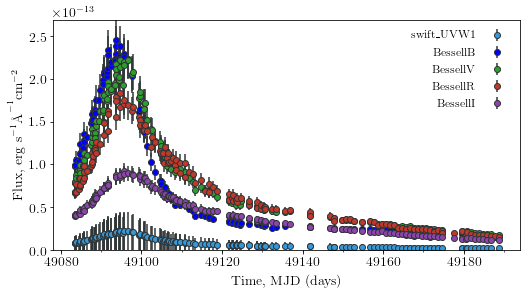

True

In [8]:
snname = "SN1993J"
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)

sn.plot_lc(multiplot=False)
pcc.coco.test_LCfit(snname)

Let's try running a fit anyway:

In [9]:
# pcc.coco.run_LCfit(snname+".dat") ## This will look for a file called SN2006aj.dat in the current working directory

Unless you had the file in here, this probably threw a warning. To run, it is best to give the explicit path to the file you want to fit, like so.

In [10]:
pcc.coco.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"))

current list.txt is up to date. re run with force = True to force.
No Model supplied - running with default


Great, let's take a look at what we have.

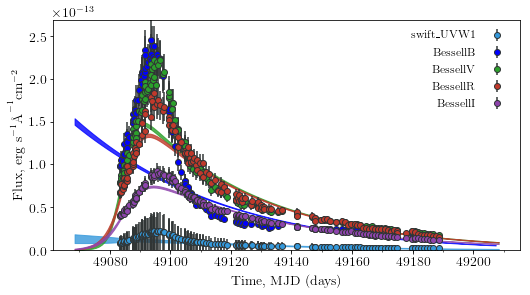

In [11]:
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))

sn.plot_lc(multiplot=False)

## All SNe as Batch
___

You can run using a file input containing a list of the lightcurves. 

In [11]:
lclist_path = os.path.join(pcc.defaults._default_coco_dir_path, "lists/lightcurves.list")

with open(lclist_path, "r") as f:
    print(f.read())

data/lc/SN1993J.dat
data/lc/SN1994I.dat
data/lc/SN1996cb.dat
data/lc/SN1998bw.dat
data/lc/SN1999dn.dat
data/lc/SN2002ap.dat
data/lc/SN2003jd.dat
data/lc/SN2004aw.dat
data/lc/SN2005bf.dat
data/lc/SN2005hg.dat
data/lc/SN2006aj.dat
data/lc/SN2007C.dat
data/lc/SN2007Y.dat
data/lc/SN2007gr.dat
data/lc/SN2007uy.dat
data/lc/SN2008D.dat
data/lc/SN2008ax.dat
data/lc/SN2008bo.dat
data/lc/SN2009bb.dat
data/lc/SN2009er.dat
data/lc/SN2009iz.dat
data/lc/SN2009jf.dat
data/lc/SN2010al.dat
data/lc/SN2010as.dat
data/lc/SN2011bm.dat
data/lc/SN2011dh.dat
data/lc/SN2011ei.dat
data/lc/SN2011fu.dat
data/lc/SN2012ap.dat
data/lc/SN2013ge.dat
data/lc/iPTF13bvn.dat



In [10]:
run_all = True
# run_all = False

if run_all:                                  ## This can take a while!
    pcc.coco.run_LCfit_fileinput(lclist_path)
    print("Done.")

NameError: name 'lclist_path' is not defined

## Call Specfit
---
specfitting takes the list of spectra that lives in `COCO_ROOT_DIR/lists/` and adjusts their fluxes, by multiplying them by a cubic spline, so that their spectrophotometric flux matches that of the light curves we have just done at their observed MJD. 

### individual speclists

In [6]:
pcc.coco.test_specfit(sn.name)

True

In [12]:
pcc.coco.specfit_sn(SNobject=sn, overwrite=True, verbose=False)

['BessellB', 'BessellI', 'BessellR', 'BessellV', 'swift_UVW1']
Writing /Users/szymon/Projects/CoCo/recon/SN1993J_m.dat
Writing /Users/szymon/Projects/CoCo/recon/SN1993J_49084.000000.spec
Writing /Users/szymon/Projects/CoCo/recon/SN1993J_49092.000000.spec
Writing /Users/szymon/Projects/CoCo/recon/SN1993J_49095.000000.spec
Writing /Users/szymon/Projects/CoCo/recon/SN1993J_49097.000000.spec
Writing /Users/szymon/Projects/CoCo/recon/SN1993J_49098.000000.spec
Writing /Users/szymon/Projects/CoCo/recon/SN1993J_49100.000000.spec
Writing /Users/szymon/Projects/CoCo/recon/SN1993J_49111.000000.spec
Writing /Users/szymon/Projects/CoCo/recon/SN1993J_49114.000000.spec
Writing /Users/szymon/Projects/CoCo/recon/SN1993J_49123.000000.spec
Writing /Users/szymon/Projects/CoCo/recon/SN1993J_49126.000000.spec
Writing /Users/szymon/Projects/CoCo/recon/SN1993J_49130.000000.spec
Writing /Users/szymon/Projects/CoCo/recon/SN1993J_49132.000000.spec
Writing /Users/szymon/Projects/CoCo/recon/SN1993J_49135.000000.sp

## All Speclists
___

In [13]:
specfit_all = True
# specfit_all = False
if specfit_all:           ## This also might take a while!
    pcc.coco.specfit_all(overwrite=False, verbose=True)

0 SN2011bm /Users/szymon/Projects/CoCo/lists/SN2011bm.list
/Users/szymon/Projects/CoCo/data/lc/SN2011bm.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55647.6            7.48971e-18 ...           1.197797e-17            3.00145e-18
55866.6             4.2542e-18 ...           4.687992e-18           3.820408e-18
55865.6            4.37632e-18 ...           4.819998e-18           3.932642e-18
55864.6            4.50195e-18 ...           4.955723e-18           4.048177e-18
55863.6            4.63118e-18 ...           5.095263e-18           4.167097e-18
55862.6            4.76413e-18 ...           5.238741e-18           4.289519e-18
55861.6            4.90089e-18 ...           5.386252e-18           4.415528e-18
55860.6            5.04159e-18 ...           5.537928e-18           4

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/classes.py:2402: UserWarning: No self.lambda_effective set.
  warnings.warn("No self.lambda_effective set.")


SDSS_g.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55848.6            2.15345e-17 ...           2.373135e-17           1.933765e-17
55847.6            2.20127e-17 ...            2.42433e-17            1.97821e-17
55846.6            2.25015e-17 ...           2.476627e-17           2.023673e-17
55845.6            2.30011e-17 ...           2.530046e-17           2.070174e-17
55844.6            2.35119e-17 ...           2.584627e-17           2.117753e-17
55843.6             2.4034e-17 ...            2.64038e-17            2.16642e-17
55842.6            2.45677e-17 ...           2.697337e-17           2.216203e-17
55840.6             2.5671e-17 ...           2.814968e-17           2.319232e-17
55849.6            2.10668e-17 ...           2.323032e-17           1.890328e-17
55839.6          

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011bm_55662.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51408204
Integrated flux =  5.17645080674e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51408204
Integrated flux =  5.17645080674e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.883331
Integrated flux =  1.75294929813e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.883331
Integrated flux =  1.75294929813e-13
False
False
False
False
False
False
False
Scale Factor 1.09991479533e+15
norm factor 53.5159
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.797452        0.767428 ... True      #2ca02c  5436.8698117
    SDSS_g   1.05768         0.92803 ... True      #00ff00 4775.6

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011bm_55665.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51558193
Integrated flux =  3.83494687851e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51558193
Integrated flux =  3.83494687851e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8765315
Integrated flux =  2.4805798093e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8765315
Integrated flux =  2.4805798093e-13
False
False
False
False
False
False
False
Scale Factor 9.50276540378e+14
norm factor 63.4249
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.837084        0.788228 ... True      #2ca02c  5436.8698117
    SDSS_g  0.958797        0.937021 ... True      #00ff00 4775.6

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011bm_55669.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51474095
Integrated flux =  3.97950811884e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51474095
Integrated flux =  3.97950811884e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8648625
Integrated flux =  5.32303714694e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8648625
Integrated flux =  5.32303714694e-14
False
False
False
False
False
False
False
Scale Factor 9.61327677955e+14
norm factor 66.7738
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.884062        0.840999 ... True      #2ca02c  5436.8698117
    SDSS_g  0.962774        0.951003 ... True      #00ff00 4775.61516927

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011bm_55671.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51352201
Integrated flux =  4.81150660052e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51352201
Integrated flux =  4.81150660052e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8824447
Integrated flux =  1.7502866274e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8824447
Integrated flux =  1.7502866274e-13
False
False
False
False
False
False
False
Scale Factor 1.0419569095e+15
norm factor 65.7267
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.977874        0.897958 ... True      #2ca02c  5436.8698117
    SDSS_g   0.99421        0.964719 ... True      #00ff00 4775.61

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011bm_55675.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51499878
Integrated flux =  6.23912550663e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51499878
Integrated flux =  6.23912550663e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8847331
Integrated flux =  1.2246996526e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8847331
Integrated flux =  1.2246996526e-13
False
False
False
False
False
False
False
Scale Factor 1.53341472796e+15
norm factor 60.8945
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.22431         1.44043 ... True      #2ca02c  5436.8698117
    SDSS_g  1.10468         1.10357 ... True      #00ff00 4775.615169

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011bm_55688.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51209141
Integrated flux =  6.95840683896e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51209141
Integrated flux =  6.95840683896e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8838295
Integrated flux =  4.4735433717e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8838295
Integrated flux =  4.4735433717e-14
False
False
False
False
False
False
False
Scale Factor 1.86900302259e+15
norm factor 49.4079
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.33983         1.41757 ... True      #2ca02c  5436.8698117
    SDSS_g  1.15565         1.09329 ... True      #00ff00 4775.615169

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011bm_55695.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51217513
Integrated flux =  7.02667378455e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51217513
Integrated flux =  7.02667378455e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8790048
Integrated flux =  1.05502449964e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8790048
Integrated flux =  1.05502449964e-13
False
False
False
False
False
False
False
Scale Factor 2.27812645292e+15
norm factor 37.5717
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.46375         1.10471 ... True      #2ca02c  5436.8698117
    SDSS_g   1.2081        0.978019 ... True      #00ff00 4775.6151

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011bm_55702.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51438801
Integrated flux =  1.11942641833e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51438801
Integrated flux =  1.11942641833e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8811027
Integrated flux =  2.53156126509e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8811027
Integrated flux =  2.53156126509e-14
False
False
False
False
False
False
False
Scale Factor 4.12751698939e+15
norm factor 33.6004
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.90644         1.80255 ... True      #2ca02c  5436.8698117
    SDSS_g  1.37959         1.23338 ... True      #00ff00 4775.6151

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011bm_55723.900000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/data/lc/SN2008bo.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
54544.5            1.03406e-17 ...           1.253549e-17            8.14571e-18
54641.5            7.96588e-18 ...           8.661892e-18           7.269868e-18
54642.5             7.4087e-18 ...            8.06635e-18            6.75105e-18
54643.5            6.89051e-18 ...           7.511764e-18           6.269256e-18
54644.5            6.40857e-18 ...           6.995305e-18           5.821835e-18
54645.5            5.96035e-18 ...           6.514358e-18           5.406342e-18
54646.5            5.54349e-18 ...           6.066483e-18           5.020497e-18
54647.5             5.1558e-18 ...           5.649408e-18           4.662192e-18
54648.5            4.79523e-18 ...           5.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008bo_54562.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


97.0588
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.670286        0.778042 ... True      #2ca02c  5436.8698117
    SDSS_i  0.400837        0.430958 ... True      #fd00ff 7491.95615852
    SDSS_r  0.570217        0.642995 ... True      #ff0000  6213.6698859
swift_UVW1 0.0665104        0.637793 ... True      #3498db 2627.26670833
-1082.45926236
0.329714
-0.000304597144383 2.3263410188
3586.40317757
0.503707
0.000140449020347 -0.30248665606
-1082.45926236
0.221958
-0.000205049842072 1.89287113585
3586.40317757
0.00520211
1.45051025345e-06 0.633981829191
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799828
Integrated flux =  11295.2315995
filter =  BessellB
min w

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008bo_54566.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799828
Integrated flux =  2.01991466771e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799828
Integrated flux =  2.01991466771e-13
False
False
False
False
False
Scale Factor 6.57508691142e+14
norm factor 82.6944
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV 0.663498        0.709464 ... True      #2ca02c  5436.8698117
    SDSS_i 0.404703        0.350654 ... True      #fd00ff 7491.95615852
    SDSS_r 0.571088        0.553075 ... True      #ff0000  6213.6698859
swift_UVW1  0.06596        0.620147 ... True      #3498db 2627.26670833
-1082.45926236
0.336502
-0.000310868284573 2.3536481378
3586.40317757
0.505128
0.000140845398196 -0.304078435677
-1082.45926236
0.2

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008bo_54568.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799828
Integrated flux =  1.2532868333e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799828
Integrated flux =  1.2532868333e-13
False
False
False
False
False
Scale Factor 2.0683920104e+15
norm factor 44.1084
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.19643         1.17742 ... True      #2ca02c  5436.8698117
    SDSS_i 0.859954        0.985777 ... True      #fd00ff 7491.95615852
    SDSS_r  1.13768         1.17777 ... True      #ff0000  6213.6698859
swift_UVW1 0.119925        0.645638 ... True      #3498db 2627.26670833
-1082.45926236
-0.196429
0.000181465943222 0.209822782489
3586.40317757
1.01775
0.000283780380752 -0.625641724701
-1082.45926236
-0.17

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008bo_54584.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.879959
Integrated flux =  1.47617509516e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.879959
Integrated flux =  1.47617509516e-13
False
False
False
False
False
Scale Factor 2.96926984965e+15
norm factor 29.1652
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.45425         1.09619 ... True      #2ca02c  5436.8698117
    SDSS_i  1.09578         0.90012 ... True      #fd00ff 7491.95615852
    SDSS_r  1.42403         1.06507 ... True      #ff0000  6213.6698859
swift_UVW1 0.145792        0.721833 ... True      #3498db 2627.26670833
-1082.45926236
-0.454248
0.000419644274934 -0.827303457744
3586.40317757
1.27824
0.000356412258969 -0.790597578145
-1082.45926236
-0.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008bo_54589.900000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801951
Integrated flux =  1.5658637461e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801951
Integrated flux =  1.5658637461e-13
False
False
False
False
False
Scale Factor 3.96414788169e+15
norm factor 19.7729
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.69818          0.9527 ... True      #2ca02c  5436.8698117
    SDSS_i  1.32841        0.771306 ... True      #fd00ff 7491.95615852
    SDSS_r  1.70239        0.918148 ... True      #ff0000  6213.6698859
swift_UVW1 0.170153         0.69304 ... True      #3498db 2627.26670833
-1082.45926236
-0.698179
0.000644993001794 -1.80856433126
3586.40317757
1.53223
0.000427234161251 -0.95230542433
-1082.45926236
0.047

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008bo_54593.880000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799828
Integrated flux =  1.56712877142e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799828
Integrated flux =  1.56712877142e-13
False
False
False
False
False
Scale Factor 6.11480257239e+15
norm factor 12.7073
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  2.13938        0.954235 ... True      #2ca02c  5436.8698117
    SDSS_i  1.76963        0.744437 ... True      #fd00ff 7491.95615852
    SDSS_r  2.22158        0.896066 ... True      #ff0000  6213.6698859
swift_UVW1 0.213944        0.687581 ... True      #3498db 2627.26670833
-1082.45926236
-1.13938
0.00105258484658 -3.58338661963
3586.40317757
2.00764
0.00055979215453 -1.25677909448
-1082.45926236
0.0457

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008bo_54599.850000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801951
Integrated flux =  1.50702480938e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801951
Integrated flux =  1.50702480938e-13
False
False
False
False
False
Scale Factor 1.68065447118e+16
norm factor 4.4954
scaled 
  filter   fitflux spec_filterflux ... mask knot_colours   lambda_eff 
---------- ------- --------------- ... ---- ------------ -------------
  BessellB     1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV 3.63725        0.924518 ... True      #2ca02c  5436.8698117
    SDSS_i 3.42421        0.736862 ... True      #fd00ff 7491.95615852
    SDSS_r 4.10096        0.854109 ... True      #ff0000  6213.6698859
swift_UVW1 0.36037        0.642911 ... True      #3498db 2627.26670833
-1082.45926236
-2.63725
0.00243634699431 -9.60885511351
3586.40317757
3.74059
0.00104299333908 -2.37985175605
-1082.45926236
0.0754815
-6.9

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008bo_54613.780000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8793569
Integrated flux =  9.14136172349e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8793569
Integrated flux =  9.14136172349e-14
False
False
False
False
False
Scale Factor 3.21743012962e+16
norm factor 2.49779
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  5.08227         1.22765 ... True      #2ca02c  5436.8698117
    SDSS_i  5.19974         0.91692 ... True      #fd00ff 7491.95615852
    SDSS_r  6.04171         1.15739 ... True      #ff0000  6213.6698859
swift_UVW1 0.499019         0.41482 ... True      #3498db 2627.26670833
-1082.45926236
-4.08227
0.00377128953148 -15.4217429205
3586.40317757
5.5427
0.00154547460814 -3.56135484056
-1082.45926236
-0.2276

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008bo_54622.730000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



/Users/szymon/Projects/CoCo/data/lc/SN2009iz.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55080.4            1.75652e-17 ...           2.164651e-17           1.348389e-17
55168.4            2.42434e-17 ...           2.597824e-17           2.250856e-17
55167.4            2.56642e-17 ...           2.746207e-17           2.386633e-17
55166.4            2.71684e-17 ...           2.903077e-17           2.530603e-17
55165.4            2.87608e-17 ...            3.06891e-17            2.68325e-17
55164.4            3.04467e-17 ...           3.244232e-17           2.845108e-17
55163.4            3.22314e-17 ...           3.429566e-17           3.016714e-17
55162.4            3.41208e-17 ...           3.625496e-17           3.198664e-17
55161.4             3.6121e-17 ...           3

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009iz_55095.190000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8806911
Integrated flux =  2.73767694752e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8806911
Integrated flux =  2.73767694752e-13
False
False
False
False
False
Scale Factor 1.60999664282e+15
norm factor 31.972
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.845006        0.709016 ... True      #2ca02c  5436.8698117
    SDSS_i  0.387817        0.355986 ... True      #fd00ff 7491.95615852
    SDSS_r  0.654522        0.540956 ... True      #ff0000  6213.6698859
swift_UVW1 0.0852061        0.795722 ... True      #3498db 2627.26670833
-1082.45926236
0.154994
-0.000143187088077 1.62349536685
3586.40317757
0.569316
0.000158742963292 -0.331854011234
-1082.45926

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009iz_55099.130000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8795326
Integrated flux =  3.22974425195e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8795326
Integrated flux =  3.22974425195e-13
False
False
False
False
False
Scale Factor 1.87554898409e+15
norm factor 33.1385
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.15864        0.913184 ... True      #2ca02c  5436.8698117
    SDSS_i 0.759505        0.572516 ... True      #fd00ff 7491.95615852
    SDSS_r  1.08244        0.773513 ... True      #ff0000  6213.6698859
swift_UVW1 0.112822         1.13348 ... True      #3498db 2627.26670833
-1082.45926236
-0.158644
0.000146558607839 0.361823651927
3586.40317757
0.969616
0.00027035894368 -0.597483115421
-1082.45926236
0.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009iz_55113.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8806911
Integrated flux =  7.7314397183e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8806911
Integrated flux =  7.7314397183e-14
False
False
False
False
False
Scale Factor 2.59651461068e+15
norm factor 29.2332
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.35919         1.12133 ... True      #2ca02c  5436.8698117
    SDSS_i 0.982151        0.808718 ... True      #fd00ff 7491.95615852
    SDSS_r   1.3221         1.00409 ... True      #ff0000  6213.6698859
swift_UVW1 0.134946        0.331369 ... True      #3498db 2627.26670833
-1082.45926236
-0.359186
0.000331824304327 -0.44489925129
3586.40317757
1.18715
0.000331014826095 -0.734718124698
-1082.45926236
-0.1

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009iz_55119.840000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


0.000195403244231 -0.194547378666
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8804325
Integrated flux =  5646.42458324
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.898823317
Integrated flux =  958.898778941
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100201053
Integrated flux =  1034.69973521
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15424667
Integrated flux =  1129.90049446
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resam

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009iz_55120.820000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Integrated flux =  5.38259701446e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8804016
Integrated flux =  5.38259701446e-14
False
False
False
False
False
Scale Factor 2.90179844873e+15
norm factor 29.9356
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.43157         1.24065 ... True      #2ca02c  5436.8698117
    SDSS_i   1.0589        0.977775 ... True      #fd00ff 7491.95615852
    SDSS_r  1.40474         1.16439 ... True      #ff0000  6213.6698859
swift_UVW1 0.142774        0.264017 ... True      #3498db 2627.26670833
-1082.45926236
-0.431568
0.000398692054602 -0.7360688885
3586.40317757
1.26196
0.000351874704843 -0.781694950092
-1082.45926236
-0.240648
0.000222315906375 0.0319452719935
3586.40317757
0.900371
0.0002510511709 -0.395561397499
filte

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009iz_55121.810000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


0.000317573935573 -0.382847414467
3586.40317757
0.820772
0.000228856670484 -0.0814730472286
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8802329
Integrated flux =  9205.49768686
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900472787
Integrated flux =  958.900414897
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.09985544
Integrated flux =  1200.11248156
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15438835
Integrated flux =  1485.55501527
filter =  SDSS_i
min waveleng

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009iz_55129.700000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



2.83939
0.000791709260881 -1.77566884831
-1082.45926236
0.377501
-0.00034874357493 2.51857270169
3586.40317757
0.324483
9.04758782894e-05 -0.0129725792052
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8798566
Integrated flux =  3979.97080196
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899276755
Integrated flux =  958.899282907
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100435071
Integrated flux =  555.954365799
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.154471

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009iz_55150.400000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.880104
Integrated flux =  5.83595681886e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.880104
Integrated flux =  5.83595681886e-14
False
False
False
False
False
Scale Factor 2.07271805048e+16
norm factor 4.10621
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  3.48595         1.37476 ... True      #2ca02c  5436.8698117
    SDSS_i  3.27468         0.94562 ... True      #fd00ff 7491.95615852
    SDSS_r  3.70315         1.30021 ... True      #ff0000  6213.6698859
swift_UVW1 0.355315        0.280464 ... True      #3498db 2627.26670833
-1082.45926236
-2.48595
0.00229657646843 -9.00023680152
3586.40317757
3.34784
0.00093348063762 -2.09718787049
-1082.45926236
-0.37476

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009iz_55156.320000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/data/lc/SN2011fu.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55815.5            9.10118e-16 ...          9.1646416e-16          9.0377184e-16
55933.5            3.66214e-17 ...           3.710865e-17           3.613415e-17
55934.5            3.55074e-17 ...          3.5985546e-17          3.5029254e-17
55935.5            3.44249e-17 ...          3.4894016e-17          3.3955784e-17
55936.5             3.3373e-17 ...          3.3833163e-17          3.2912837e-17
55937.5            3.23511e-17 ...           3.280239e-17           3.189981e-17
55938.5            3.13583e-17 ...          3.1800802e-17          3.0915798e-17
55939.5            3.03938e-17 ...          3.0827601e-17          2.9959999e-17
55940.5             2.9457e-17 ...          2.9

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011fu_55837.180000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51766328
Integrated flux =  7.13098041098e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51766328
Integrated flux =  7.13098041098e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8847198
Integrated flux =  1.29040389445e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8847198
Integrated flux =  1.29040389445e-13
False
False
False
False
False
False
Scale Factor 2.0259732971e+15
norm factor 25.2557
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.569168        0.428594 ... True      #8e44ad 8011.65864198
  BessellR 0.875195        0.712194 ... True      #c0392b 6416.11806798
  

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011fu_55840.120000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51435087
Integrated flux =  6.68093031864e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51435087
Integrated flux =  6.68093031864e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801682
Integrated flux =  1.32625607614e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801682
Integrated flux =  1.32625607614e-13
False
False
False
False
False
False
Scale Factor 2.23866634899e+15
norm factor 26.075
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.651715        0.453328 ... True      #8e44ad 8011.65864198
  BessellR  1.00286        0.740999 ... True      #c0392b 6416.11806798
  

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011fu_55844.050000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51417334
Integrated flux =  7.19050017334e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51417334
Integrated flux =  7.19050017334e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800084
Integrated flux =  1.68104240399e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800084
Integrated flux =  1.68104240399e-13
False
False
False
False
False
False
Scale Factor 2.47534101853e+15
norm factor 24.4464
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.716174        0.464037 ... True      #8e44ad 8011.65864198
  BessellR  1.10057        0.755192 ... True      #c0392b 6416.11806798
 

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011fu_55847.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51315468
Integrated flux =  7.6330842916e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51315468
Integrated flux =  7.6330842916e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.881364
Integrated flux =  1.27052151367e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.881364
Integrated flux =  1.27052151367e-13
False
False
False
False
False
False
Scale Factor 2.66981955474e+15
norm factor 24.8866
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.754851        0.616476 ... True      #8e44ad 8011.65864198
  BessellR  1.15838         1.03581 ... True      #c0392b 6416.11806798
  Bes

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011fu_55850.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51575837
Integrated flux =  5.78222696059e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51575837
Integrated flux =  5.78222696059e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799015
Integrated flux =  5.86827465805e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799015
Integrated flux =  5.86827465805e-14
False
False
False
False
False
False
Scale Factor 3.19180069817e+15
norm factor 32.6764
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.825311        0.828309 ... True      #8e44ad 8011.65864198
  BessellR  1.26282         1.69267 ... True      #c0392b 6416.11806798
 

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011fu_55857.800000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8787756
Integrated flux =  1.86205263214e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8787756
Integrated flux =  1.86205263214e-15
False
False
False
False
False
False
Scale Factor 3.44732693783e+15
norm factor 32.2463
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.850638         1.10701 ... True      #8e44ad 8011.65864198
  BessellR  1.30044         1.84493 ... True      #c0392b 6416.11806798
  BessellV  1.38096         1.67533 ... True      #2ca02c  5436.8698117
    SDSS_z  1.22415        0.866123 ... True      #660066 8830.73037462
swift_UVW1 0.138763       0.0116879 ... True      #3498db 2627.26670833
-3657.24809263
0.149362
-4.08399064636e-05 1.17783371

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011fu_55860.740000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51442136
Integrated flux =  1.10199326527e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51442136
Integrated flux =  1.10199326527e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801423
Integrated flux =  6.18177671107e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801423
Integrated flux =  6.18177671107e-14
False
False
False
False
False
False
Scale Factor 3.63078119388e+15
norm factor 28.0147
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.866847         1.06072 ... True      #8e44ad 8011.65864198
  BessellR  1.32459         1.45329 ... True      #c0392b 6416.11806798
 

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011fu_55862.710000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51476059
Integrated flux =  5.05111159415e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51476059
Integrated flux =  5.05111159415e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8786357
Integrated flux =  1.06247512333e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8786357
Integrated flux =  1.06247512333e-13
False
False
False
False
False
False
Scale Factor 3.72592620317e+15
norm factor 23.86
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.874772        0.687709 ... True      #8e44ad 8011.65864198
  BessellR  1.33643         1.31388 ... True      #c0392b 6416.11806798
  B

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011fu_55863.690000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51389752
Integrated flux =  1.05961678728e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51389752
Integrated flux =  1.05961678728e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799667
Integrated flux =  1.37493710744e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799667
Integrated flux =  1.37493710744e-13
False
False
False
False
False
False
Scale Factor 3.823744471e+15
norm factor 28.7694
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.882633         1.15372 ... True      #8e44ad 8011.65864198
  BessellR  1.34819         1.58764 ... True      #c0392b 6416.11806798
  BessellV  1.42032 

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011fu_55864.670000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5150463
Integrated flux =  9.10829619892e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5150463
Integrated flux =  9.10829619892e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8816254
Integrated flux =  9.2789924121e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8816254
Integrated flux =  9.2789924121e-14
False
False
False
False
False
False
Scale Factor 3.92433361965e+15
norm factor 25.4549
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.890453         1.01442 ... True      #8e44ad 8011.65864198
  BessellR  1.35991         1.49902 ... True      #c0392b 6416.11806798
  Bes

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011fu_55865.650000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51452076
Integrated flux =  1.11610069194e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51452076
Integrated flux =  1.11610069194e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801613
Integrated flux =  5.74995690842e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801613
Integrated flux =  5.74995690842e-14
False
False
False
False
False
False
Scale Factor 4.59214669211e+15
norm factor 27.025
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.937543          1.4893 ... True      #8e44ad 8011.65864198
  BessellR  1.43083         2.08904 ... True      #c0392b 6416.11806798
  

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011fu_55871.540000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51282444
Integrated flux =  1.01321838453e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51282444
Integrated flux =  1.01321838453e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8792973
Integrated flux =  1.04258531036e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8792973
Integrated flux =  1.04258531036e-13
False
False
False
False
False
False
Scale Factor 5.68060032365e+15
norm factor 16.7198
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.00367         1.05629 ... True      #8e44ad 8011.65864198
  BessellR  1.53111         1.54167 ... True      #c0392b 6416.11806798
 

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011fu_55879.400000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51490351
Integrated flux =  8.4939575204e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51490351
Integrated flux =  8.4939575204e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8814751
Integrated flux =  2.96436593795e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8814751
Integrated flux =  2.96436593795e-14
False
False
False
False
False
False
Scale Factor 6.49969623005e+15
norm factor 22.0255
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.04836         1.65984 ... True      #8e44ad 8011.65864198
  BessellR   1.5991         2.26693 ... True      #c0392b 6416.11806798
  B

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011fu_55884.310000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51438354
Integrated flux =  1.27603892184e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51438354
Integrated flux =  1.27603892184e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800955
Integrated flux =  1.78482042564e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800955
Integrated flux =  1.78482042564e-13
False
False
False
False
False
False
Scale Factor 7.05053910024e+15
norm factor 12.8512
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.07665        0.957831 ... True      #8e44ad 8011.65864198
  BessellR  1.64221         1.16287 ... True      #c0392b 6416.11806798
 

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011fu_55887.250000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.50406181
Integrated flux =  9.24830792694e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.50406181
Integrated flux =  9.24830792694e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800148
Integrated flux =  3.95310534827e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800148
Integrated flux =  3.95310534827e-14
False
False
False
False
False
False
Scale Factor 8.3118259006e+15
norm factor 14.2325
scaled 
  filter   fitflux spec_filterflux ... mask knot_colours   lambda_eff 
---------- ------- --------------- ... ---- ------------ -------------
  BessellB     1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.1373         1.19103 ... True      #8e44ad 8011.65864198
  BessellR 1.73465         1.97329 ... True      #c0392b 6416.11806798
  Besse

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011fu_55893.140000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/data/lc/SN2005bf.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
53452.7            1.45552e-16 ...          1.4723674e-16          1.4386726e-16
53552.7            1.21886e-17 ...          1.2413414e-17          1.1963786e-17
53551.7            1.35571e-17 ...          1.3799761e-17          1.3314439e-17
53550.7             1.5079e-17 ...          1.5340691e-17          1.4817309e-17
53549.7            1.67717e-17 ...           1.705365e-17           1.648975e-17
53548.7            1.86541e-17 ...          1.8957576e-17          1.8350624e-17
53547.7            2.07475e-17 ...          2.1073801e-17          2.0421199e-17
53546.7            2.30755e-17 ...          2.3425951e-17          2.2725049e-17
53545.7            2.56642e-17 ...          2.6

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53479.380000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  2.30155038686e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  2.30155038686e-13
False
False
False
False
False
False
Scale Factor 9.11485629025e+14
norm factor 63.1446
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.770928        0.705774 ... True      #2ca02c  5436.8698117
    SDSS_g  0.942971        0.894289 ... True      #00ff00 4775.61516927
    SDSS_i  0.378845        0.362149 ... True      #fd00ff 7491.95615852
    SDSS_r  0.607855        0.543045 ... True      #ff0000  6213.6698859
swift_UVW1 0.0771063        0.747982 ... True      #3498db 2627.26670833
-1082.45926236
0.229072
-0.000211621852503 1.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53490.180000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15418665
Integrated flux =  1.08028314661e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15418665
Integrated flux =  1.08028314661e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  2.19491752989e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  2.19491752989e-13
False
False
False
False
False
False
Scale Factor 8.50542373719e+14
norm factor 69.7054
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.770409        0.714673 ... True      #2ca02c  5436.8698117
    SDSS_g  0.946507        0.898054 ... True      #00ff00 4775.61516

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53492.140000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  2.29905639092e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  2.29905639092e-13
False
False
False
False
False
False
Scale Factor 8.25580968509e+14
norm factor 71.1449
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.770036        0.711172 ... True      #2ca02c  5436.8698117
    SDSS_g  0.949456        0.895969 ... True      #00ff00 4775.61516927
    SDSS_i  0.386964        0.367691 ... True      #fd00ff 7491.95615852
    SDSS_r  0.617255         0.56765 ... True      #ff0000  6213.6698859
swift_UVW1 0.0769317        0.762496 ... True      #3498db 2627.26670833
-1082.45926236
0.229964
-0.000212445941819 1.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53493.120000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  1.79949696755e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  1.79949696755e-13
False
False
False
False
False
False
Scale Factor 8.04328882111e+14
norm factor 81.4464
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.769755        0.791028 ... True      #2ca02c  5436.8698117
    SDSS_g  0.953309        0.921388 ... True      #00ff00 4775.61516927
    SDSS_i  0.390974        0.462825 ... True      #fd00ff 7491.95615852
    SDSS_r  0.621761        0.663491 ... True      #ff0000  6213.6698859
swift_UVW1 0.0768712        0.665643 ... True      #3498db 2627.26670833
-1082.45926236
0.230245
-0.000212705348793 1.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53494.100000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  2.53208046292e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  2.53208046292e-13
False
False
False
False
False
False
Scale Factor 7.86687272909e+14
norm factor 74.9317
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.769724        0.694543 ... True      #2ca02c  5436.8698117
    SDSS_g  0.958209        0.885853 ... True      #00ff00 4775.61516927
    SDSS_i  0.395857        0.374588 ... True      #fd00ff 7491.95615852
    SDSS_r  0.627208        0.563409 ... True      #ff0000  6213.6698859
swift_UVW1 0.0768342         0.84281 ... True      #3498db 2627.26670833
-1082.45926236
0.230276
-0.000212734532766 1.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53495.090000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  1.86924171839e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  1.86924171839e-13
False
False
False
False
False
False
Scale Factor 7.73094167966e+14
norm factor 85.5492
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.770113        0.783609 ... True      #2ca02c  5436.8698117
    SDSS_g  0.964132        0.908199 ... True      #00ff00 4775.61516927
    SDSS_i  0.401629        0.452189 ... True      #fd00ff 7491.95615852
    SDSS_r  0.633612        0.682467 ... True      #ff0000  6213.6698859
swift_UVW1 0.0768391        0.698069 ... True      #3498db 2627.26670833
-1082.45926236
0.229887
-0.000212375129387 1.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53496.070000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803961
Integrated flux =  3.04968318049e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803961
Integrated flux =  3.04968318049e-13
False
False
False
False
False
False
Scale Factor 7.63458074275e+14
norm factor 54.9239
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.771102        0.711869 ... True      #2ca02c  5436.8698117
    SDSS_g  0.971196        0.896274 ... True      #00ff00 4775.61516927
    SDSS_i   0.40845        0.403262 ... True      #fd00ff 7491.95615852
    SDSS_r  0.641153        0.583682 ... True      #ff0000  6213.6698859
swift_UVW1 0.0769043        0.722081 ... True      #3498db 2627.26670833
-1082.45926236
0.228898
-0.000211460845075 1.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53497.050000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  2.1215637206e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  2.1215637206e-13
False
False
False
False
False
False
Scale Factor 7.56648780763e+14
norm factor 82.3615
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.775687        0.729713 ... True      #2ca02c  5436.8698117
    SDSS_g  0.988933        0.908708 ... True      #00ff00 4775.61516927
    SDSS_i  0.425739        0.400505 ... True      #fd00ff 7491.95615852
    SDSS_r  0.660185         0.58591 ... True      #ff0000  6213.6698859
swift_UVW1 0.0772988         0.74655 ... True      #3498db 2627.26670833
-1082.45926236
0.224313
-0.000207225699972 1.90234571445

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53499.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  1.92543187265e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  1.92543187265e-13
False
False
False
False
False
False
Scale Factor 7.59846604455e+14
norm factor 83.1283
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV 0.779677        0.731661 ... True      #2ca02c  5436.8698117
    SDSS_g 0.999652        0.911418 ... True      #00ff00 4775.61516927
    SDSS_i 0.436456        0.393473 ... True      #fd00ff 7491.95615852
    SDSS_r  0.67193         0.59411 ... True      #ff0000  6213.6698859
swift_UVW1 0.077669        0.686732 ... True      #3498db 2627.26670833
-1082.45926236
0.220323
-0.000203539103432 1.88629281

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53499.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800231
Integrated flux =  1.42521271263e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800231
Integrated flux =  1.42521271263e-13
False
False
False
False
False
False
Scale Factor 7.67759541622e+14
norm factor 75.6515
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV   0.78507        0.841225 ... True      #2ca02c  5436.8698117
    SDSS_g   1.01159        0.948064 ... True      #00ff00 4775.61516927
    SDSS_i  0.448718        0.485198 ... True      #fd00ff 7491.95615852
    SDSS_r  0.685324        0.713755 ... True      #ff0000  6213.6698859
swift_UVW1 0.0781815        0.467419 ... True      #3498db 2627.26670833
-1082.45926236
0.21493
-0.000198556848624 1.8

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53500.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8802365
Integrated flux =  1.70462836313e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8802365
Integrated flux =  1.70462836313e-13
False
False
False
False
False
False
Scale Factor 7.99090657832e+14
norm factor 83.813
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.800871         0.79224 ... True      #2ca02c  5436.8698117
    SDSS_g   1.03904        0.932239 ... True      #00ff00 4775.61516927
    SDSS_i  0.478482        0.470692 ... True      #fd00ff 7491.95615852
    SDSS_r  0.717595        0.659214 ... True      #ff0000  6213.6698859
swift_UVW1 0.0797152        0.644646 ... True      #3498db 2627.26670833
-1082.45926236
0.199129
-0.000183960071619 1.8

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53502.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  1.68063079415e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  1.68063079415e-13
False
False
False
False
False
False
Scale Factor 8.23057500252e+14
norm factor 82.636
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.811512        0.798825 ... True      #2ca02c  5436.8698117
    SDSS_g   1.05421        0.933268 ... True      #00ff00 4775.61516927
    SDSS_i  0.496025         0.47976 ... True      #fd00ff 7491.95615852
    SDSS_r  0.736455        0.669698 ... True      #ff0000  6213.6698859
swift_UVW1 0.0807609         0.64544 ... True      #3498db 2627.26670833
-1082.45926236
0.188488
-0.00017412914751 1.75

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53503.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  1.46365846153e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  1.46365846153e-13
False
False
False
False
False
False
Scale Factor 8.89822532219e+14
norm factor 86.0293
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV   0.83895         0.94263 ... True      #2ca02c  5436.8698117
    SDSS_g   1.08687        0.988684 ... True      #00ff00 4775.61516927
    SDSS_i  0.536904        0.629913 ... True      #fd00ff 7491.95615852
    SDSS_r  0.779925        0.822801 ... True      #ff0000  6213.6698859
swift_UVW1 0.0834771        0.632665 ... True      #3498db 2627.26670833
-1082.45926236
0.16105
-0.000148781215161 1.6

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53505.880000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8796886
Integrated flux =  9.46690452843e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8796886
Integrated flux =  9.46690452843e-14
False
False
False
False
False
False
Scale Factor 2.83192470428e+15
norm factor 34.0795
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.33052         1.25874 ... True      #2ca02c  5436.8698117
    SDSS_g  1.31657         1.07606 ... True      #00ff00 4775.61516927
    SDSS_i  1.07231         1.05664 ... True      #fd00ff 7491.95615852
    SDSS_r   1.3076         1.29465 ... True      #ff0000  6213.6698859
swift_UVW1 0.132838        0.515902 ... True      #3498db 2627.26670833
-1082.45926236
-0.330516
0.000305338141973 -0.3295676

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53520.600000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.879637
Integrated flux =  2.91598850932e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.879637
Integrated flux =  2.91598850932e-14
False
False
False
False
False
False
Scale Factor 3.44462188534e+15
norm factor 51.4976
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.43399         2.07267 ... True      #2ca02c  5436.8698117
    SDSS_g  1.33797         1.30215 ... True      #00ff00 4775.61516927
    SDSS_i  1.16751         2.11418 ... True      #fd00ff 7491.95615852
    SDSS_r   1.3972         2.33586 ... True      #ff0000  6213.6698859
swift_UVW1 0.143286        0.292078 ... True      #3498db 2627.26670833
-1082.45926236
-0.433992
0.000400931566603 -0.745820702

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53522.570000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  7.06550886281e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  7.06550886281e-14
False
False
False
False
False
False
Scale Factor 3.80261819003e+15
norm factor 26.6688
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.48884          1.2793 ... True      #2ca02c  5436.8698117
    SDSS_g   1.3479         1.08472 ... True      #00ff00 4775.61516927
    SDSS_i  1.21653         1.16117 ... True      #fd00ff 7491.95615852
    SDSS_r  1.44311         1.27527 ... True      #ff0000  6213.6698859
swift_UVW1 0.148829        0.404589 ... True      #3498db 2627.26670833
-1082.45926236
-0.48884
0.000451601165725 -0.96645688

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53523.550000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.879637
Integrated flux =  5.1180608351e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.879637
Integrated flux =  5.1180608351e-14
False
False
False
False
False
False
Scale Factor 5.13767458207e+15
norm factor 22.2512
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.66733          1.4879 ... True      #2ca02c  5436.8698117
    SDSS_g  1.37534         1.15575 ... True      #00ff00 4775.61516927
    SDSS_i  1.37037         1.29236 ... True      #fd00ff 7491.95615852
    SDSS_r  1.58639         1.53074 ... True      #ff0000  6213.6698859
swift_UVW1 0.166897        0.330377 ... True      #3498db 2627.26670833
-1082.45926236
-0.667331
0.000616494797236 -1.6844714487


/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53526.490000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  1.35958949237e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809717
Integrated flux =  1.35958949237e-13
False
False
False
False
False
False
Scale Factor 5.68603326904e+15
norm factor 18.3892
scaled 
  filter   fitflux spec_filterflux ... mask knot_colours   lambda_eff 
---------- ------- --------------- ... ---- ------------ -------------
  BessellB     1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV 1.73166         1.28127 ... True      #2ca02c  5436.8698117
    SDSS_g 1.38385         1.07642 ... True      #00ff00 4775.61516927
    SDSS_i 1.42401         1.24363 ... True      #fd00ff 7491.95615852
    SDSS_r  1.6361         1.32559 ... True      #ff0000  6213.6698859
swift_UVW1 0.17342        0.802719 ... True      #3498db 2627.26670833
-1082.45926236
-0.731663
0.000675926471227 -1.94326135689
358

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53527.470000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799923
Integrated flux =  1.78770347929e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799923
Integrated flux =  1.78770347929e-13
False
False
False
False
False
False
Scale Factor 7.73390200266e+15
norm factor 13.5117
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.94088         1.27306 ... True      #2ca02c  5436.8698117
    SDSS_g  1.40797         1.08765 ... True      #00ff00 4775.61516927
    SDSS_i  1.59321         1.21713 ... True      #fd00ff 7491.95615852
    SDSS_r   1.7921         1.29461 ... True      #ff0000  6213.6698859
swift_UVW1 0.194667         1.05484 ... True      #3498db 2627.26670833
-1082.45926236
-0.940882
0.000869208179097 -2.7848892

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005bf_53530.420000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/data/lc/SN2007C.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
54099.5            2.93653e-15 ...            3.05516e-15             2.8179e-15
54197.5            7.18477e-19 ...            8.37527e-19            5.99427e-19
54198.5            6.57134e-19 ...            7.67909e-19            5.46359e-19
54199.5            6.00967e-19 ...            7.04035e-19            4.97899e-19
54200.5            5.49544e-19 ...           6.454361e-19           4.536519e-19
54201.5            5.02469e-19 ...           5.916791e-19           4.132589e-19
54202.5            4.59381e-19 ...           5.423697e-19           3.763923e-19
54203.5            4.19946e-19 ...           4.971425e-19           3.427495e-19
54204.5            3.83858e-19 ...           4.5

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007C_54109.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.879871
Integrated flux =  8.70869153813e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.879871
Integrated flux =  8.70869153813e-14
False
False
False
False
False
Scale Factor 8.07094649349e+14
norm factor 116.879
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV   1.3325         1.25693 ... True      #2ca02c  5436.8698117
    SDSS_i  0.95951        0.972133 ... True      #fd00ff 7491.95615852
    SDSS_r  1.27564         1.15314 ... True      #ff0000  6213.6698859
swift_UVW1 0.130913        0.463872 ... True      #3498db 2627.26670833
-1082.45926236
-0.3325
0.000307170950532 -0.337548487054
3586.40317757
1.14472
0.000319184052501 -0.707668377366
-1082.45926236
-0.25

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007C_54110.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.879871
Integrated flux =  7.76200140827e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.879871
Integrated flux =  7.76200140827e-14
False
False
False
False
False
Scale Factor 1.1186751865e+15
norm factor 94.4271
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV   1.5696         1.37334 ... True      #2ca02c  5436.8698117
    SDSS_i  1.19908         1.15819 ... True      #fd00ff 7491.95615852
    SDSS_r  1.56396         1.29974 ... True      #ff0000  6213.6698859
swift_UVW1 0.154868        0.462976 ... True      #3498db 2627.26670833
-1082.45926236
-0.569601
0.000526210377781 -1.29133602018
3586.40317757
1.40909
0.000392898100415 -0.87737985386
-1082.45926236
-0.373

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007C_54114.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



-1082.45926236
-0.704049
0.000650416595361 -1.83218088431
3586.40317757
1.56386
0.000436051964603 -0.977163010079
-1082.45926236
-0.375951
0.000347311743145 -0.512337799053
3586.40317757
0.949458
0.000264738122963 -0.264536589723
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800554
Integrated flux =  7632.97671022
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899786084
Integrated flux =  958.899868205
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100004379
Integrated flux =  1228.86171281
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
mi

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007C_54116.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800554
Integrated flux =  7441.46215287
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899786084
Integrated flux =  958.899807357
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100004379
Integrated flux =  1270.86467556
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15425851
Integrated flux =  1628.39365083
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007C_54121.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8807543
Integrated flux =  7.89172557073e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8807543
Integrated flux =  7.89172557073e-14
False
False
False
False
False
Scale Factor 1.23233536071e+16
norm factor 9.77009
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  5.19934         1.49585 ... True      #2ca02c  5436.8698117
    SDSS_i  6.04113         1.99858 ... True      #fd00ff 7491.95615852
    SDSS_r  6.92939         1.78802 ... True      #ff0000  6213.6698859
swift_UVW1 0.520251        0.536517 ... True      #3498db 2627.26670833
-1082.45926236
-4.19934
0.0038794437931 -15.8926910378
3586.40317757
6.40914
0.00178706692384 -4.17485016046
-1082.45926236
-0.4958

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007C_54142.850000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8796668
Integrated flux =  9.50659734166e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8796668
Integrated flux =  9.50659734166e-14
False
False
False
False
False
Scale Factor 2.62469708749e+16
norm factor 4.56209
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  7.56507         1.45146 ... True      #2ca02c  5436.8698117
    SDSS_i  9.98605         1.92086 ... True      #fd00ff 7491.95615852
    SDSS_r  11.0359         1.72726 ... True      #ff0000  6213.6698859
swift_UVW1 0.755371        0.642766 ... True      #3498db 2627.26670833
-1082.45926236
-6.56507
0.00606495993699 -25.409325531
3586.40317757
10.2805
0.00286651738568 -6.77573555615
-1082.45926236
-0.451459
0.0004

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007C_54151.800000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



False
False
False
False
False
Scale Factor 4.00480705588e+16
norm factor 2.75658
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  9.32394         1.29702 ... True      #2ca02c  5436.8698117
    SDSS_i  13.2081         1.49606 ... True      #fd00ff 7491.95615852
    SDSS_r  14.3021          1.4386 ... True      #ff0000  6213.6698859
swift_UVW1 0.928714        0.530413 ... True      #3498db 2627.26670833
-1082.45926236
-8.32394
0.00768983896718 -32.4847159215
3586.40317757
13.3734
0.00372891326516 -8.86813588128
-1082.45926236
-0.297017
0.000274391347027 -0.194812576145
3586.40317757
0.908187
0.000253230501188 -0.134891152936
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007C_54156.770000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/data/lc/SN1996cb.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
50423.4            5.87353e-18 ...           1.290849e-17           -1.16143e-18
50492.4            1.54177e-15 ...          1.6174406e-15          1.4660994e-15
50491.4            1.60698e-15 ...          1.6829301e-15          1.5310299e-15
50490.4            1.67495e-15 ...          1.7510935e-15          1.5988065e-15
50489.4             1.7458e-15 ...          1.8220476e-15          1.6695524e-15
50488.4            1.81965e-15 ...          1.8959095e-15          1.7433905e-15
50487.4            1.89664e-15 ...          1.9728177e-15          1.8204623e-15
50486.4            1.97689e-15 ...          2.0528919e-15          1.9008881e-15
50485.4            2.06055e-15 ...          2.1

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1996cb_50434.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



SN1996cb_50435.040000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
1996cb_-0.5.txt <pycoco.classes.SpectrumClass object at 0x144202ef0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899914479
Integrated flux =  1.24131682318e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899914479
Integrated flux =  1.24131682318e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51495334
Integrated flux =  1.46199904751e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51495334
Integrated flux =  1.46199904751e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099851454
Integrated flux =  1.07071290333e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099851454
Integrated flux =  1.07071290333e-14
filter =  

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1996cb_50435.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


1129.37380838
SN1996cb_50450.000000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
1996cb_2.49.txt <pycoco.classes.SpectrumClass object at 0x144149080>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899952514
Integrated flux =  1.08269942652e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899952514
Integrated flux =  1.08269942652e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51495334
Integrated flux =  1.60544539464e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51495334
Integrated flux =  1.60544539464e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099851454
Integrated flux =  1.08576583907e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099851454
Integrated flux =  1.08576583907e-

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1996cb_50450.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1996cb_50452.990000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
1996cb_6.48.txt <pycoco.classes.SpectrumClass object at 0x1441495f8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899952514
Integrated flux =  8.91267782991e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899952514
Integrated flux =  8.91267782991e-15
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51495334
Integrated flux =  1.78231292801e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51495334
Integrated flux =  1.78231292801e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099851454
Integrated flux =  1.15589447498e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099851454
Integrated flux =  1.15589447498e-14
filter =  s

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1996cb_50452.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1996cb_50456.980000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
1996cb_7.48.txt <pycoco.classes.SpectrumClass object at 0x144202f98>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899914479
Integrated flux =  8.06994251655e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899914479
Integrated flux =  8.06994251655e-15
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51495334
Integrated flux =  1.75259616013e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51495334
Integrated flux =  1.75259616013e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099851454
Integrated flux =  1.08195625944e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099851454
Integrated flux =  1.08195625944e-14
filter =  s

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1996cb_50456.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



SN1996cb_50457.980000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
1996cb_8.48.txt <pycoco.classes.SpectrumClass object at 0x14454f4a8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899976881
Integrated flux =  7.53278672626e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899976881
Integrated flux =  7.53278672626e-15
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51980219
Integrated flux =  1.76806063091e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51980219
Integrated flux =  1.76806063091e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099850452
Integrated flux =  1.0551108045e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099850452
Integrated flux =  1.0551108045e-14
filter =  sw

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1996cb_50457.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1996cb_50458.980000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
1996cb_9.48.txt <pycoco.classes.SpectrumClass object at 0x1435d2e80>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899976881
Integrated flux =  7.68973952939e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899976881
Integrated flux =  7.68973952939e-15
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51980219
Integrated flux =  1.83462842803e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51980219
Integrated flux =  1.83462842803e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099850452
Integrated flux =  1.03571895006e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099850452
Integrated flux =  1.03571895006e-14
filter =  s

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1996cb_50458.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1996cb_50459.980000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
1996cb_28.43.txt <pycoco.classes.SpectrumClass object at 0x1456125c0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899914479
Integrated flux =  5.27119194823e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899914479
Integrated flux =  5.27119194823e-15
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51495334
Integrated flux =  2.12883305374e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51495334
Integrated flux =  2.12883305374e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099851454
Integrated flux =  1.05175463839e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099851454
Integrated flux =  1.05175463839e-14
filter =  

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1996cb_50459.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



SN1996cb_50478.930000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
1996cb_30.43.txt <pycoco.classes.SpectrumClass object at 0x145612048>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899914479
Integrated flux =  5.25972010314e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899914479
Integrated flux =  5.25972010314e-15
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51495334
Integrated flux =  2.12323032354e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51495334
Integrated flux =  2.12323032354e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099851454
Integrated flux =  1.05661927568e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099851454
Integrated flux =  1.05661927568e-14
filter = 

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1996cb_50478.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


SN1996cb_50480.930000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
1996cb_34.42.txt <pycoco.classes.SpectrumClass object at 0x1442cccf8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899914479
Integrated flux =  5.2467650791e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899914479
Integrated flux =  5.2467650791e-15
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51495334
Integrated flux =  2.14200383774e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51495334
Integrated flux =  2.14200383774e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099851454
Integrated flux =  1.05239858774e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099851454
Integrated flux =  1.05239858774e-14
filter =  sw

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1996cb_50480.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


3914.73086059
SN1996cb_50484.920000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
1996cb_38.41.txt <pycoco.classes.SpectrumClass object at 0x14454f048>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899976881
Integrated flux =  5.46420899605e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899976881
Integrated flux =  5.46420899605e-15
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51980219
Integrated flux =  2.11308796029e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51980219
Integrated flux =  2.11308796029e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099850452
Integrated flux =  1.05204228426e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099850452
Integrated flux =  1.05204228426e

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1996cb_50484.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



SN1996cb_50488.910000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
1996cb_42.4.txt <pycoco.classes.SpectrumClass object at 0x144149d30>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900170851
Integrated flux =  5.55015227149e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900170851
Integrated flux =  5.55015227149e-15
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51495334
Integrated flux =  2.06584283765e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51495334
Integrated flux =  2.06584283765e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099851454
Integrated flux =  1.05229757318e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099851454
Integrated flux =  1.05229757318e-14
filter =  

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1996cb_50488.910000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


3569.15812766
SN1996cb_50492.900000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
Done
7 SN2007gr /Users/szymon/Projects/CoCo/lists/SN2007gr.list


/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1996cb_50492.900000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/data/lc/SN2007gr.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
54313.4            1.61149e-41 ...           1.551029e-40          -1.228731e-40
54656.4            2.70195e-17 ...          2.7480539e-17          2.6558461e-17
54655.4            2.75088e-17 ...          2.7976413e-17          2.7041187e-17
54654.4             2.8007e-17 ...          2.8481275e-17          2.7532725e-17
54653.4            2.85141e-17 ...          2.8995124e-17          2.8033076e-17
54652.4            2.90305e-17 ...          2.9518363e-17          2.8542637e-17
54651.4            2.95562e-17 ...          3.0050991e-17          2.9061409e-17
54650.4            3.00914e-17 ...          3.0593211e-17          2.9589589e-17
54649.4            3.06363e-17 ...          3.1

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54329.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


1501.0
max wavelength =  10999.0
Filter_area =  17709.8800677
Integrated flux =  11477.5683595
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899965162
Integrated flux =  958.899951909
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100394971
Integrated flux =  709.484687138
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.53197586
Integrated flux =  845.984977765
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.29819278
Integrated flux =  444.493736093
SN2007gr_54330.020000.spe

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54330.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Integrated flux =  1.48753064597e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8808849
Integrated flux =  1.97652862566e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8808849
Integrated flux =  1.97652862566e-13
False
False
False
False
False
Scale Factor 1.0939294368e+14
norm factor 434.306
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.800313        0.287169 ... True      #8e44ad 8011.65864198
  BessellR  1.48462        0.490793 ... True      #c0392b 6416.11806798
  BessellV  1.75398        0.791317 ... True      #2ca02c  5436.8698117
swift_UVW1 0.173775         0.53024 ... True      #3498db 2627.26670833
-3657.24809263
0.199687
-5.46004744192e-05 1.23775288181
2809.60310338
1.5802
0.000562429960938

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54332.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



False
False
Scale Factor 1.11669373517e+14
norm factor 422.246
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.902688        0.307077 ... True      #8e44ad 8011.65864198
  BessellR  1.54678          0.5094 ... True      #c0392b 6416.11806798
  BessellV  1.75825        0.794119 ... True      #2ca02c  5436.8698117
swift_UVW1  0.17574        0.284822 ... True      #3498db 2627.26670833
-3657.24809263
0.0973124
-2.6608091204e-05 1.11586255304
2809.60310338
1.58251
0.000563250372483 -1.30406918691
-3657.24809263
0.692923
-0.000189465764933 1.82501172556
2809.60310338
0.509297
0.000181270176948 -0.191422875536
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8815232
Integrate

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54333.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Integrated flux =  958.899683348
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099929514
Integrated flux =  615.179556955
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.52021254
Integrated flux =  633.17204504
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30000206
Integrated flux =  322.766213607
SN2007gr_54334.010000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
2007gr_-4.19.txt <pycoco.classes.SpectrumClass object at 0x14528ff28>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900479192
Integrated flux =  1.94508037251e-1

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54334.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



-3657.24809263
0.689525
-0.00018853669961 1.82096619372
2809.60310338
0.579075
0.000206105722248 -0.305588935971
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.881523
Integrated flux =  4177.86312639
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900479192
Integrated flux =  958.900462362
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099987534
Integrated flux =  727.85959112
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51014835
Integrated flux =  847.824316287
filter

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54335.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


-3657.24809263
0.587211
-0.00016056082594 1.69914775429
2809.60310338
0.645588
0.000229778940073 -0.339737469814
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8810129
Integrated flux =  4674.57792396
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899990566
Integrated flux =  958.899981779
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099840843
Integrated flux =  812.310651707
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51517536
Integrated flux =  1012.08369271
filte

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54338.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8807515
Integrated flux =  7.87451887588e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8807515
Integrated flux =  7.87451887588e-14
False
False
False
False
False
Scale Factor 1.33499062946e+14
norm factor 540.072
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.15238        0.542443 ... True      #8e44ad 8011.65864198
  BessellR  1.54679        0.826386 ... True      #c0392b 6416.11806798
  BessellV  1.68563         1.07362 ... True      #2ca02c  5436.8698117
swift_UVW1 0.169647        0.320581 ... True      #3498db 2627.26670833
-3657.24809263
-0.152378
4.16646829572e-05 0.818574864996
2809.60310338
1.51599
0.000539573548174 -1.24795699906
-3657.24809263
0.457557
-0.000125109599

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54342.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 1.33186234485
2809.60310338
0.900528
0.000320518001369 -0.557258863241
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8806389
Integrated flux =  5044.25949298
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899750193
Integrated flux =  958.899728054
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100254412
Integrated flux =  1058.64153039
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51972412
Integrated flux =  1481.25037333
filter =  BessellI
min wavelength =  1500.4492

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54344.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


0.237626
-6.49740267356e-05 1.28292352785
2809.60310338
0.972399
0.000346098349331 -0.642105194846
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8806389
Integrated flux =  4731.85834603
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899750193
Integrated flux =  958.899713847
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100254412
Integrated flux =  1107.07500432
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51972412
Integrated flux =  1553.43335778
filter =  BessellI


/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54345.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Filter_area =  893.099833433
Integrated flux =  1172.07374777
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51996567
Integrated flux =  1677.6388384
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30015155
Integrated flux =  1193.70913123
SN2007gr_54346.990000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
2007gr_8.79.txt <pycoco.classes.SpectrumClass object at 0x145464eb8>
filter = 

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54346.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899750193
Integrated flux =  1.01109946548e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899750193
Integrated flux =  1.01109946548e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30036926
Integrated flux =  1.43490284248e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30036926
Integrated flux =  1.43490284248e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51972412
Integrated flux =  1.94389535334e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51972412
Integrated flux =  1.94389535334e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100254412
Integrated flux =  1.30046157082e-14
filter =  BessellV
min wavelength =  1501.0
max wavelengt

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54347.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8798901
Integrated flux =  7105.88426437
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900025498
Integrated flux =  958.90010122
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100304474
Integrated flux =  1137.04626854
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51002734
Integrated flux =  1699.65234367
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0


/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54349.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8807176
Integrated flux =  4.54443375791e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8807176
Integrated flux =  4.54443375791e-14
False
False
False
False
False
Scale Factor 1.54084202762e+14
norm factor 690.852
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.14256         1.13242 ... True      #8e44ad 8011.65864198
  BessellR  1.50114          1.3492 ... True      #c0392b 6416.11806798
  BessellV   1.6287          1.4935 ... True      #2ca02c  5436.8698117
swift_UVW1 0.163699        0.273154 ... True      #3498db 2627.26670833
-3657.24809263
-0.142559
3.8979803799e-05 0.830265931126
2809.60310338
1.465
0.000521427203966 -1.20622894529
-3657.24809263
-0.132

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54350.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Integrated flux =  1358.7340918
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51991669
Integrated flux =  2218.71048894
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30025802
Integrated flux =  1703.9219411
SN2007gr_54351.980000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
2007gr_13.78.txt <pycoco.classes.SpectrumClass object at 0x1466df518>


/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54351.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.901053543
Integrated flux =  1.01374409428e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.901053543
Integrated flux =  1.01374409428e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.3004741
Integrated flux =  1.39301007102e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.3004741
Integrated flux =  1.39301007102e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51693228
Integrated flux =  2.19392888773e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51693228
Integrated flux =  2.19392888773e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100144643
Integrated flux =  1.39537051908e-14
filter =  BessellV
min wavelength =  1501.0
max wa

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54352.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



1.44637
0.000514796321847 -1.19097984271
-3657.24809263
-0.275569
7.53486546985e-05 0.671901142311
2809.60310338
1.28477
0.000457276418148 -0.919389667659
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8808546
Integrated flux =  4994.13994781
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899874792
Integrated flux =  958.899875606
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.09984093
Integrated flux =  1399.27547562
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51991

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54353.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Filter_area =  958.89967674
Integrated flux =  958.899625897
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100187999
Integrated flux =  1384.18033411
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51973488
Integrated flux =  2319.13531116
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30038201
Integrated flux =  1831.70504213
SN2007gr_54354.970000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
2007gr_17.77.txt <pycoco.classes.SpectrumClass object at 0x14546f6a0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.901469971
Integr

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54354.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 -0.728826733047
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8780971
Integrated flux =  6768.28735431
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.901469971
Integrated flux =  958.901446182
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099802417
Integrated flux =  1402.42030741
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.516938
Integrated flux =  2485.7035378
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the respon

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54356.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900161224
Integrated flux =  7.93566707701e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900161224
Integrated flux =  7.93566707701e-15
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30022782
Integrated flux =  1.66885324453e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30022782
Integrated flux =  1.66885324453e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51989357
Integrated flux =  2.06307519216e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51989357
Integrated flux =  2.06307519216e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099833103
Integrated flux =  1.18118438968e-14
filter =  BessellV
min wavelength =  1501.0
max 

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54357.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8798425
Integrated flux =  5.07839804259e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8798425
Integrated flux =  5.07839804259e-14
False
False
False
False
False
Scale Factor 1.91046067288e+14
norm factor 571.623
scaled 
  filter   fitflux spec_filterflux ... mask knot_colours   lambda_eff 
---------- ------- --------------- ... ---- ------------ -------------
  BessellB     1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.1217           1.312 ... True      #8e44ad 8011.65864198
  BessellR 1.43516         1.45171 ... True      #c0392b 6416.11806798
  BessellV 1.54692         1.48098 ... True      #2ca02c  5436.8698117
swift_UVW1 0.15517        0.313155 ... True      #3498db 2627.26670833
-3657.24809263
-0.121695
3.32750956437e-05 0.855106572499
2809.60310338
1.39175
0.000495356183202 -1.14626284505
-3657.24809263
-0.312001


/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54362.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.10449         1.55736 ... True      #8e44ad 8011.65864198
  BessellR  1.38243         1.54762 ... True      #c0392b 6416.11806798
  BessellV  1.48194         1.64018 ... True      #2ca02c  5436.8698117
swift_UVW1 0.148408        0.183758 ... True      #3498db 2627.26670833
-3657.24809263
-0.104492
2.85713255628e-05 0.875588718561
2809.60310338
1.33353
0.00047463319686 -1.09857946463
-3657.24809263
-0.557362
0.00015239921052 0.33639127
2809.60310338
1.45642
0.000518372045003 -1.17814395359
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8795067
Integrated flux =  3254.32664101
filter =  BessellB
min wavelength =  1500.4492

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54372.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801648
Integrated flux =  6280.10060627
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900740632
Integrated flux =  958.900736268
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099830051
Integrated flux =  1131.36802366
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51969366
Integrated flux =  1821.45910349
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavele

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54379.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8808546
Integrated flux =  6.88592499564e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8808546
Integrated flux =  6.88592499564e-14
False
False
False
False
False
Scale Factor 2.73399076957e+14
norm factor 334.046
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.08754         1.04313 ... True      #8e44ad 8011.65864198
  BessellR  1.33157         1.15847 ... True      #c0392b 6416.11806798
  BessellV  1.41963         1.28826 ... True      #2ca02c  5436.8698117
swift_UVW1 0.141938        0.355099 ... True      #3498db 2627.26670833
-3657.24809263
-0.0875361
2.39349626702e-05 0.895777346051
2809.60310338
1.27769
0.000454757013042 -1.052829632
-3657.24809263
-0.0

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54382.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Filter_area =  17709.8801648
Integrated flux =  7.52475649795e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801648
Integrated flux =  7.52475649795e-14
False
False
False
False
False
Scale Factor 2.83340181262e+14
norm factor 320.593
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.08419         1.02915 ... True      #8e44ad 8011.65864198
  BessellR  1.32167         1.12495 ... True      #c0392b 6416.11806798
  BessellV  1.40753         1.25175 ... True      #2ca02c  5436.8698117
swift_UVW1 0.140684        0.385957 ... True      #3498db 2627.26670833
-3657.24809263
-0.0841901
2.30200600279e-05 0.899761148164
2809.60310338
1.26684
0.000450897989933 -1.04394550762
-3657.24809263
-0.0291483
7.97001994039e-06 0.965295141884
2809.60310338
0.865795
0.00030

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007gr_54384.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/data/lc/SN2002ap.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
52289.7            4.16016e-18 ...           4.719237e-18           3.601083e-18
52667.7            1.74988e-25 ...            2.10046e-25             1.3993e-25
52666.7            1.88369e-25 ...            2.25995e-25            1.50743e-25
52665.7            2.02774e-25 ...           2.431558e-25           1.623922e-25
52664.7            2.18281e-25 ...             2.6162e-25            1.74942e-25
52663.7            2.34973e-25 ...           2.814855e-25           1.884605e-25
52662.7            2.52942e-25 ...           3.028598e-25           2.030242e-25
52661.7            2.72285e-25 ...           3.258571e-25           2.187129e-25
52660.7            2.93107e-25 ...           3.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52305.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.269914        0.443363 ... True      #8e44ad 8011.65864198
  BessellR 0.561948        0.660405 ... True      #c0392b 6416.11806798
  BessellV  1.04466        0.914975 ... True      #2ca02c  5436.8698117
swift_UVW1 0.104799        0.389782 ... True      #3498db 2627.26670833
-3657.24809263
0.730086
-0.000199627137804 1.86925851479
2809.60310338
0.939865
0.000334518840323 -0.77407159751
-3657.24809263
0.556637
-0.000152200965588 1.66274543057
2809.60310338
0.525193
0.000186927796229 -0.101327045176
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8810526
Integrated flux =  6902.99565751
filter =  BessellB
min wavelength =  1500.4492

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52306.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Scale Factor 3.54820093791e+13
norm factor 2259.17
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  0.246837        0.361175 ... True      #8e44ad 8011.65864198
  BessellR  0.571864        0.724831 ... True      #c0392b 6416.11806798
  BessellV   0.94747          1.1677 ... True      #2ca02c  5436.8698117
swift_UVW1 0.0948654         0.47997 ... True      #3498db 2627.26670833
-3657.24809263
0.753163
-0.000205937011268 1.89673423476
2809.60310338
0.852605
0.000303460836648 -0.702407112085
-3657.24809263
0.638825
-0.000174673570378 1.76060043755
2809.60310338
0.68773
0.000244778202396 -0.163128001375
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.882015
Integrated flux

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52307.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8793006
Integrated flux =  9.12860067374e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8793006
Integrated flux =  9.12860067374e-14
False
False
False
False
False
Scale Factor 2.85406827455e+13
norm factor 2915.94
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.238941        0.407241 ... True      #8e44ad 8011.65864198
  BessellR 0.552067        0.792328 ... True      #c0392b 6416.11806798
  BessellV 0.917072         1.24745 ... True      #2ca02c  5436.8698117
swift_UVW1  0.09169        0.428975 ... True      #3498db 2627.26670833
-3657.24809263
0.761059
-0.000208096029609 1.90613554661
2809.60310338
0.825382
0.000293771592159 -0.680126320061
-3657.24809263
0.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52308.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


norm factor 2078.21
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.280867        0.269886 ... True      #8e44ad 8011.65864198
  BessellR 0.515914        0.590832 ... True      #c0392b 6416.11806798
  BessellV  1.09351         1.02607 ... True      #2ca02c  5436.8698117
swift_UVW1 0.109075        0.252963 ... True      #3498db 2627.26670833
-3657.24809263
0.719133
-0.000196632244251 1.85621751871
2809.60310338
0.984432
0.00035038117678 -0.811469791155
-3657.24809263
0.730114
-0.000199634846605 1.86929220128
2809.60310338
0.773104
0.000275164869617 -0.469968911983
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8795938
Integrated flux =  4479.93720329
filter =  BessellB


/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52311.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



2809.60310338
0.720251
0.00025635327755 -0.299668934111
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803255
Integrated flux =  6620.65219842
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900194314
Integrated flux =  958.900135192
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100132363
Integrated flux =  977.132382266
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51583402
Integrated flux =  1043.79046039
filter =  BessellI
min wavelength =  1500.44922166
max wavele

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52312.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 1501.0
max wavelength =  10999.0
Filter_area =  17709.8803255
Integrated flux =  6172.83788506
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900194314
Integrated flux =  958.900184086
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100132363
Integrated flux =  973.874308649
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51583402
Integrated flux =  1020.29638782
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.29996941
Integrated flux =  480.403073839
SN2002ap_52313.000000.sp

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52313.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



max wavelength =  10999.0
Filter_area =  17709.8803255
Integrated flux =  8.08474459955e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803255
Integrated flux =  8.08474459955e-14
False
False
False
False
False
Scale Factor 2.72786025252e+13
norm factor 2689.03
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.362529        0.399882 ... True      #8e44ad 8011.65864198
  BessellR 0.570127        0.741864 ... True      #c0392b 6416.11806798
  BessellV  1.36488         1.19082 ... True      #2ca02c  5436.8698117
swift_UVW1 0.136103        0.334864 ... True      #3498db 2627.26670833
-3657.24809263
0.637471
-0.000174303450155 1.75898878214
2809.60310338
1.22878
0.000437349064683 -1.01292996117
-3657.24809263
0.600118
-0.000164089941017 1.71451497021
2809.60

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52314.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


-3657.24809263
0.417824
-0.000114245389243 1.49747126853
2809.60310338
1.08886
0.000387549668097 -0.593044158236
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8784685
Integrated flux =  7529.39231966
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900060438
Integrated flux =  958.90001039
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100320148
Integrated flux =  1352.16549965
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51156765
Integrated flux =  1709.95995438
filter

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52315.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8796118
Integrated flux =  4.99456519105e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8796118
Integrated flux =  4.99456519105e-14
False
False
False
False
False
Scale Factor 3.12394651583e+13
norm factor 1710.3
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.419334        0.450301 ... True      #8e44ad 8011.65864198
  BessellR 0.630069        0.890766 ... True      #c0392b 6416.11806798
  BessellV  1.48704          1.3206 ... True      #2ca02c  5436.8698117
swift_UVW1 0.148374         0.15068 ... True      #3498db 2627.26670833
-3657.24809263
0.580666
-0.00015877124332 1.69135517685
2809.60310338
1.33867
0.000476461387419 -1.10341729873
-3657.24809263
0.5496

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52315.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



2809.60310338
1.37658
0.000489956045688 -1.13460355336
-3657.24809263
0.430335
-0.000117666418132 1.51236789242
2809.60310338
1.06906
0.000380500942945 -0.675640623261
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803255
Integrated flux =  5738.65297401
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900194314
Integrated flux =  958.900236256
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100132363
Integrated flux =  1244.17192745
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52316.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



1.40541
0.000500215051059 -1.15829477285
-3657.24809263
0.444776
-0.000121615035391 1.52956179307
2809.60310338
1.04526
0.000372029947653 -0.662415878285
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803255
Integrated flux =  5578.71809805
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900194314
Integrated flux =  958.900183892
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100132363
Integrated flux =  1214.85055134
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51583

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52317.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Filter_area =  17709.8796098
Integrated flux =  4132.81823157
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900010031
Integrated flux =  958.900034188
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099992263
Integrated flux =  1445.29091755
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.53003983
Integrated flux =  1969.92787417
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30001955
Integrated flux =  987.693956062
SN2002ap_52318.990000.spec
has data
No directory specified

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52318.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803255
Integrated flux =  5534.94884776
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900194314
Integrated flux =  958.900224975
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100132363
Integrated flux =  1388.56690168
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51583402
Integrated flux =  1842.37922443
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  150

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52319.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8802515
Integrated flux =  7914.42841111
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899358776
Integrated flux =  958.899310628
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.101576127
Integrated flux =  1567.95990433
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.5211228
Integrated flux =  2241.66806535
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min waveleng

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52321.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803255
Integrated flux =  5.11683789363e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803255
Integrated flux =  5.11683789363e-14
False
False
False
False
False
Scale Factor 6.03248089769e+13
norm factor 1751.54
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.711435        0.903338 ... True      #8e44ad 8011.65864198
  BessellR  1.03082          1.3547 ... True      #c0392b 6416.11806798
  BessellV  1.65074          1.6783 ... True      #2ca02c  5436.8698117
swift_UVW1 0.165066        0.305282 ... True      #3498db 2627.26670833
-3657.24809263
0.288565
-7.89021348014e-05 1.34357228814
2809.60310338
1.48567
0.000528783668307 -1.22419008148
-3657.24809263
0.0966623
-2.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52324.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


-0.776019431832
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.879906
Integrated flux =  8266.47075359
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.901083507
Integrated flux =  958.901085707
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099992263
Integrated flux =  1603.84200071
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.53003983
Integrated flux =  2508.9602122
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the respon

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52325.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Filter_area =  958.899630269
Integrated flux =  958.899569732
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100310537
Integrated flux =  1659.66916884
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51726173
Integrated flux =  2755.6161609
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30169339
Integrated flux =  1611.3876161
SN2002ap_52328.970000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
2002ap_17.86.txt <pycoco.classes.SpectrumClass object at 0x14688f780>


/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52328.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.898891836
Integrated flux =  6.2845257376e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.898891836
Integrated flux =  6.2845257376e-15
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.29427269
Integrated flux =  1.11184532321e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.29427269
Integrated flux =  1.11184532321e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51163623
Integrated flux =  1.99887611968e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51163623
Integrated flux =  1.99887611968e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.098558324
Integrated flux =  1.13316187835e-14
filter =  BessellV
min wavelength =  1501.0
max wa

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52330.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900004985
Integrated flux =  958.899958086
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099993342
Integrated flux =  1229.30736081
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.52001213
Integrated flux =  1954.9654225
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30000083
Integrated flux =  1068.2452141
SN2002ap_52331.960000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
2002ap_25.84.txt <pycoco.classes.Spec

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52331.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900194314
Integrated flux =  9.02377222666e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900194314
Integrated flux =  9.02377222666e-15
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.29996941
Integrated flux =  1.37211293419e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.29996941
Integrated flux =  1.37211293419e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51583402
Integrated flux =  2.07427786932e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51583402
Integrated flux =  2.07427786932e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100132363
Integrated flux =  1.30135883649e-14
filter =  BessellV
min wavelength =  1501.0
max 

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52338.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Integrated flux =  958.899409055
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099995068
Integrated flux =  1414.91151215
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.52006579
Integrated flux =  2363.45571417
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.2996804
Integrated flux =  1695.31418242
SN2002ap_52339.940000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
2002ap_29.83.txt <pycoco.classes.SpectrumClass object at 0x14688f438>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900194314
Integrated flux =  9.76245749015e-1

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52339.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900194314
Integrated flux =  958.900207412
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100132363
Integrated flux =  1297.08763804
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51583402
Integrated flux =  2030.47786637
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.29996941
Integrated flux =  1359.23354033
SN2002ap_52342.930000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
2002ap_30.83.txt <pycoco.classes.SpectrumClass object at 0x14719e0b

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52342.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Integrated flux =  958.900007323
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099992263
Integrated flux =  1375.30570566
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.53003983
Integrated flux =  2285.16276277
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30001955
Integrated flux =  1847.73458927
SN2002ap_52343.930000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
Done
9 SN1998bw /Users/szymon/Projects/CoCo/lists/SN1998bw.list


/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2002ap_52343.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/data/lc/SN1998bw.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
50916.3            8.19158e-21 ...           3.697028e-20          -2.058712e-20
50992.3            1.59911e-15 ...         1.60817186e-15         1.59004814e-15
50990.3            1.69388e-15 ...         1.70298217e-15         1.68477783e-15
50989.3            1.74335e-15 ...         1.75251931e-15         1.73418069e-15
50988.3            1.79427e-15 ...         1.80354528e-15         1.78499472e-15
50987.3            1.84667e-15 ...         1.85609586e-15         1.83724414e-15
50986.3            1.90061e-15 ...         1.91023677e-15         1.89098323e-15
50985.3            1.95612e-15 ...         1.96600343e-15         1.94623657e-15
50984.3            2.01325e-15 ...          2.0

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1998bw_50936.070000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 2.06999124603e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100119578
Integrated flux =  2.06999124603e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8835697
Integrated flux =  1.59209439431e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8835697
Integrated flux =  1.59209439431e-13
False
False
False
False
False
Scale Factor 1.28071274863e+14
norm factor 284.33
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  0.244589        0.235124 ... True      #8e44ad 8011.65864198
  BessellR  0.573177        0.483473 ... True      #c0392b 6416.11806798
  BessellV   1.07478           0.844 ... True      #2ca02c  5436.8698117
swift_UVW1 0.0947074        0.327361 ... Tr

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1998bw_50937.060000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


-3657.24809263
0.653148
-0.000178590064918 1.77765446269
2809.60310338
0.539351
0.000191967094377 -0.071148277598
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8818643
Integrated flux =  7671.92945426
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900734181
Integrated flux =  958.900762176
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099768475
Integrated flux =  868.585842799
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.52962018
Integrated flux =  919.189034021
filt

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1998bw_50940.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.098411498
Integrated flux =  1.8950487674e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.098411498
Integrated flux =  1.8950487674e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8811134
Integrated flux =  1.50144647102e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8811134
Integrated flux =  1.50144647102e-13
False
False
False
False
False
Scale Factor 1.42930783554e+14
norm factor 281.512
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.470063        0.258433 ... True      #8e44ad 8011.65864198
  BessellR 0.899949        0.488136 ... True      #c0392b 6416.11806798
  Bes

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1998bw_50941.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 17709.8792498
Integrated flux =  1.32516420349e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8792498
Integrated flux =  1.32516420349e-13
False
False
False
False
False
Scale Factor 1.470508193e+14
norm factor 275.027
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  0.50818        0.250835 ... True      #8e44ad 8011.65864198
  BessellR 0.953651        0.489403 ... True      #c0392b 6416.11806798
  BessellV  1.37889         0.85483 ... True      #2ca02c  5436.8698117
swift_UVW1 0.125923         0.30262 ... True      #3498db 2627.26670833
-3657.24809263
0.49182
-0.000134478041432 1.58557260227
2809.60310338
1.25296
0.000445957657959 -1.04572690897
-3657.24809263
0.749165
-0.000204843812049 1.89197405615
2809.60310338
0.55221
0.000196543680584 -0.21375285

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1998bw_50942.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8783887
Integrated flux =  1.60845622814e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8783887
Integrated flux =  1.60845622814e-13
False
False
False
False
False
Scale Factor 1.55714173792e+14
norm factor 318.981
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.558936        0.320329 ... True      #8e44ad 8011.65864198
  BessellR  1.02741        0.584585 ... True      #c0392b 6416.11806798
  BessellV  1.40308        0.974572 ... True      #2ca02c  5436.8698117
swift_UVW1 0.130584        0.451114 ... True      #3498db 2627.26670833
-3657.24809263
0.441064
-0.000120599885743 1.52514141473
2809.60310338
1.27249
0.000452907989733 -1.05932560498
-3657.24809263
0.679671
-0.0

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1998bw_50944.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.876963
Integrated flux =  1.51086811118e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.876963
Integrated flux =  1.51086811118e-13
False
False
False
False
False
Scale Factor 1.64847831388e+14
norm factor 299.062
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.585421        0.311868 ... True      #8e44ad 8011.65864198
  BessellR  1.06706        0.581822 ... True      #c0392b 6416.11806798
  BessellV  1.40979        0.969847 ... True      #2ca02c  5436.8698117
swift_UVW1 0.133163        0.420587 ... True      #3498db 2627.26670833
-3657.24809263
0.414579
-0.00011335819265 1.49360805032
2809.60310338
1.27663
0.000454379647492 -1.06061318786
-3657.24809263
0.68813

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1998bw_50945.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Filter_area =  893.101985282
Integrated flux =  1.55954906128e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8787382
Integrated flux =  6.83652521621e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8787382
Integrated flux =  6.83652521621e-14
False
False
False
False
False
Scale Factor 1.69614217685e+14
norm factor 380.185
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.593291         0.39432 ... True      #8e44ad 8011.65864198
  BessellR  1.07852        0.705836 ... True      #c0392b 6416.11806798
  BessellV  1.41003         1.12604 ... True      #2ca02c  5436.8698117
swift_UVW1 0.133963         0.24893 ... True      #3498db 2627.26670833
-3657.24809263
0.406709
-0.000111206410476 1.48423836693
2809.603

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1998bw_50946.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


0.000452945412311 -1.05507183133
-3657.24809263
0.595934
-0.000162945941942 1.70953352857
2809.60310338
0.930945
0.000331344115797 -0.639205228176
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8806221
Integrated flux =  4096.72283127
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.903242384
Integrated flux =  958.903275523
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.101901456
Integrated flux =  1038.02523305
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.52570538
Inte

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1998bw_50948.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800233
Integrated flux =  8.20784477535e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800233
Integrated flux =  8.20784477535e-14
False
False
False
False
False
Scale Factor 1.95652431697e+14
norm factor 312.216
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.610521        0.331303 ... True      #8e44ad 8011.65864198
  BessellR  1.09566        0.768433 ... True      #c0392b 6416.11806798
  BessellV   1.4005         1.26976 ... True      #2ca02c  5436.8698117
swift_UVW1 0.135453         0.28311 ... True      #3498db 2627.26670833
-3657.24809263
0.389479
-0.000106495159762 1.46372364712
2809.60310338
1.26504
0.000450257308597 -1.04749293208
-3657.24809263
0.66

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1998bw_50951.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8806382
Integrated flux =  7.85872240423e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8806382
Integrated flux =  7.85872240423e-14
False
False
False
False
False
Scale Factor 2.07130548827e+14
norm factor 352.752
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.613519        0.458255 ... True      #8e44ad 8011.65864198
  BessellR  1.09423        0.863664 ... True      #c0392b 6416.11806798
  BessellV  1.39507         1.22602 ... True      #2ca02c  5436.8698117
swift_UVW1 0.135452        0.324227 ... True      #3498db 2627.26670833
-3657.24809263
0.386481
-0.000105675337762 1.46015380556
2809.60310338
1.25962
0.000448325336147 -1.04241784044
-3657.24809263
0.54

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1998bw_50953.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8814808
Integrated flux =  8.94195974065e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8814808
Integrated flux =  8.94195974065e-14
False
False
False
False
False
Scale Factor 2.13119472349e+14
norm factor 326.9
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.614772        0.424791 ... True      #8e44ad 8011.65864198
  BessellR  1.09286        0.823377 ... True      #c0392b 6416.11806798
  BessellV  1.39227           1.199 ... True      #2ca02c  5436.8698117
swift_UVW1 0.135391        0.351766 ... True      #3498db 2627.26670833
-3657.24809263
0.385228
-0.00010533269542 1.45866174052
2809.60310338
1.25688
0.000447352136953 -1.03992226017
-3657.24809263
0.57520

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1998bw_50954.910000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



Integrated flux =  4323.01672597
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.902330644
Integrated flux =  958.902285503
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.101499597
Integrated flux =  1241.66342472
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.56903362
Integrated flux =  1520.15398459
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30196083
Integrated flux =  785.173792717
SN1998bw_50955.900000.spec
has data
No directory specified, assuming /Users/szymon/Pro

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1998bw_50955.900000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


1998bw_17.15.txt <pycoco.classes.SpectrumClass object at 0x1477c8d68>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.896758946
Integrated flux =  1.24630255313e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.896758946
Integrated flux =  1.24630255313e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30048188
Integrated flux =  1.35653554466e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30048188
Integrated flux =  1.35653554466e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.52218579
Integrated flux =  2.68531031094e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.52218579
Integrated flux =  2.68531031094e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.103225864
Integrated flux

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1998bw_50961.850000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


10999.0
Filter_area =  17709.8809236
Integrated flux =  5.97660313586e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809236
Integrated flux =  5.97660313586e-14
False
False
False
False
False
Scale Factor 2.83572306399e+14
norm factor 297.554
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.625091        0.658885 ... True      #8e44ad 8011.65864198
  BessellR  1.07208         1.14505 ... True      #c0392b 6416.11806798
  BessellV  1.36385         1.45595 ... True      #2ca02c  5436.8698117
swift_UVW1 0.133886        0.284753 ... True      #3498db 2627.26670833
-3657.24809263
0.374909
-0.000102511290629 1.44637618574
2809.60310338
1.22997
0.000437771956794 -1.01625794669
-3657.24809263
0.341115
-9.32708831355e-05 1.40613971747
2809.60310338
1.1712
0.000

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1998bw_50964.830000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.881417
Integrated flux =  9.80385307505e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.881417
Integrated flux =  9.80385307505e-14
False
False
False
False
False
Scale Factor 3.46289343935e+14
norm factor 247.077
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.632004        0.547683 ... True      #8e44ad 8011.65864198
  BessellR   1.0563         1.11964 ... True      #c0392b 6416.11806798
  BessellV   1.3442         1.51597 ... True      #2ca02c  5436.8698117
swift_UVW1 0.132572        0.473644 ... True      #3498db 2627.26670833
-3657.24809263
0.367996
-0.000100621102454 1.43814559001
2809.60310338
1.21163
0.000431245662721 -1.00042579475
-3657.24809263
0.452317
-0.000

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1998bw_50971.770000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8812751
Integrated flux =  -1.29947540486e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8812751
Integrated flux =  -1.29947540486e-13
False
False
False
False
False
Scale Factor 5.46841336939e+14
norm factor 131.225
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.648075        0.506464 ... True      #8e44ad 8011.65864198
  BessellR  1.02092        0.942612 ... True      #c0392b 6416.11806798
  BessellV  1.30032         1.30604 ... True      #2ca02c  5436.8698117
swift_UVW1  0.12964       -0.526537 ... True      #3498db 2627.26670833
-3657.24809263
0.351925
-9.62267437539e-05 1.41901074813
2809.60310338
1.17068
0.000416669695587 -0.965062674825
-3657.24809263
0

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1998bw_50987.640000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.655226         0.36907 ... True      #8e44ad 8011.65864198
  BessellR  1.00582        0.704459 ... True      #c0392b 6416.11806798
  BessellV  1.28157         1.06573 ... True      #2ca02c  5436.8698117
swift_UVW1 0.128439        0.276527 ... True      #3498db 2627.26670833
-3657.24809263
0.344774
-9.42713648749e-05 1.41049622571
2809.60310338
1.15313
0.000410424537576 -0.94985541664
-3657.24809263
0.63093
-0.000172514910586 1.75120074657
2809.60310338
0.789204
0.000280895339883 -0.461460225865
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8810263
Integrated flux =  4897.25562459
filter =  BessellB
min wavelength =  1500.4492216

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1998bw_50994.580000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/data/lc/SN2012ap.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55952.2            3.66341e-18 ...            7.29798e-18              2.884e-20
55987.2            2.48804e-16 ...          2.5504002e-16          2.4256798e-16
55988.2            2.30125e-16 ...          2.3649957e-16          2.2375043e-16
55989.2            2.12837e-16 ...          2.1935843e-16          2.0631557e-16
55990.2            1.96842e-16 ...          2.0349796e-16          1.9018604e-16
55991.2            1.82045e-16 ...           1.888108e-16           1.752792e-16
55992.2             1.6836e-16 ...           1.752045e-16           1.615155e-16
55993.2            1.55704e-16 ...          1.6259356e-16          1.4881444e-16
55994.2               1.44e-16 ...          1.5

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2012ap_55971.060000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.719094        0.715462 ... True      #8e44ad 8011.65864198
  BessellR  1.02532        0.932769 ... True      #c0392b 6416.11806798
  BessellV  1.25292         1.14335 ... True      #2ca02c  5436.8698117
swift_UVW1 0.130516        0.300228 ... True      #3498db 2627.26670833
-3657.24809263
0.280906
-7.68081278896e-05 1.33445412236
2809.60310338
1.1224
0.000399486622133 -0.919041731297
-3657.24809263
0.284538
-7.78009986144e-05 1.33877748912
2809.60310338
0.843117
0.000300084106569 -0.488172744782
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8814778
Integrated flux =  5317.0060735
filter =  BessellB
min wavelength =  1500

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2012ap_55973.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


2012ap_-0.89.txt <pycoco.classes.SpectrumClass object at 0x148cb06d8>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.90110834
Integrated flux =  1.02675603122e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.90110834
Integrated flux =  1.02675603122e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.29691635
Integrated flux =  1.32334688857e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.29691635
Integrated flux =  1.32334688857e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51410916
Integrated flux =  1.8376065437e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51410916
Integrated flux =  1.8376065437e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100362225
Integrated flux =  

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2012ap_55975.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801932
Integrated flux =  1.37252329757e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801932
Integrated flux =  1.37252329757e-13
False
False
False
False
False
Scale Factor 1.87646938526e+15
norm factor 50.6748
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.05292         1.10599 ... True      #8e44ad 8011.65864198
  BessellR  1.38397         1.26733 ... True      #c0392b 6416.11806798
  BessellV  1.56917         1.37737 ... True      #2ca02c  5436.8698117
swift_UVW1 0.144587         0.73695 ... True      #3498db 2627.26670833
-3657.24809263
-0.0529186
1.44695005676e-05 0.936993854085
2809.60310338
1.42458
0.000507040046895 -1.18754275268
-3657.24809263
-0

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2012ap_55976.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100000577
Integrated flux =  1.3703449023e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100000577
Integrated flux =  1.3703449023e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.880004
Integrated flux =  3.95382911319e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.880004
Integrated flux =  3.95382911319e-14
False
False
False
False
False
Scale Factor 2.0010271239e+15
norm factor 56.9783
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI   1.1548         1.21894 ... True      #8e44ad 8011.65864198
  BessellR   1.4712         1.61201 ... True      #c0392b 6416.11806798
  Bessel

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2012ap_55977.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8781585
Integrated flux =  4.79089530413e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8781585
Integrated flux =  4.79089530413e-14
False
False
False
False
False
Scale Factor 2.30367600149e+15
norm factor 55.6393
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI   1.3672          1.3728 ... True      #8e44ad 8011.65864198
  BessellR  1.63303         1.67757 ... True      #c0392b 6416.11806798
  BessellV  1.77179         1.73697 ... True      #2ca02c  5436.8698117
swift_UVW1 0.162394         0.34674 ... True      #3498db 2627.26670833
-3657.24809263
-0.367202
0.000100403952218 0.562799971265
2809.60310338
1.6094
0.000572820412057 -1.34255807087
-3657.24809263
-0.3

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2012ap_55979.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900229142
Integrated flux =  958.900224697
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.093477538
Integrated flux =  1746.48005059
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.5226564
Integrated flux =  3064.00806067
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.29897708
Integrated flux =  2055.65168496
SN2012ap_55982.920000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
2012ap_8.0.txt <pycoco.classes.Spec

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2012ap_55982.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900593982
Integrated flux =  8.83875207835e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900593982
Integrated flux =  8.83875207835e-15
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30003871
Integrated flux =  1.36513645339e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30003871
Integrated flux =  1.36513645339e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.521594
Integrated flux =  2.26201833634e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.521594
Integrated flux =  2.26201833634e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099928768
Integrated flux =  1.40472212061e-14
filter =  BessellV
min wavelength =  1501.0
max wave

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2012ap_55983.900000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8812375
Integrated flux =  4.94405932054e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8812375
Integrated flux =  4.94405932054e-14
False
False
False
False
False
Scale Factor 4.93545377417e+15
norm factor 40.8342
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  2.26691         2.10098 ... True      #8e44ad 8011.65864198
  BessellR  2.23393          2.8499 ... True      #c0392b 6416.11806798
  BessellV  2.06423          2.3757 ... True      #2ca02c  5436.8698117
swift_UVW1 0.227249        0.562625 ... True      #3498db 2627.26670833
-3657.24809263
-1.26691
0.000346411929294 -0.508419759337
2809.60310338
1.83699
0.000653823747646 -1.49052010059
-3657.24809263
-1.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2012ap_55989.830000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100000577
Integrated flux =  8.67194600823e-15
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100000577
Integrated flux =  8.67194600823e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.880004
Integrated flux =  2.98893469385e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.880004
Integrated flux =  2.98893469385e-14
False
False
False
False
False
Scale Factor 1.15369687355e+16
norm factor 21.7851
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  2.99741         3.01821 ... True      #8e44ad 8011.65864198
  BessellR  2.86676         2.94747 ... True      #c0392b 6416.11806798
  Bes

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2012ap_56000.700000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/data/lc/SN2009er.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
54966.1            2.09066e-15 ...           2.209128e-15           1.972192e-15
54998.1              1.439e-16 ...          1.4727932e-16          1.4052068e-16
54999.1            1.32036e-16 ...          1.3534118e-16          1.2873082e-16
55000.1            1.21131e-16 ...          1.2436514e-16          1.1789686e-16
55001.1            1.11108e-16 ...          1.1427349e-16          1.0794251e-16
55002.1            1.01898e-16 ...          1.0499651e-16           9.879949e-17
55003.1            9.34356e-17 ...           9.646814e-17           9.040306e-17
55004.1            8.56621e-17 ...           8.862905e-17           8.269515e-17
55005.1            7.85225e-17 ...           8.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009er_54977.180000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8798783
Integrated flux =  2.57702734185e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8798783
Integrated flux =  2.57702734185e-13
False
False
False
False
False
Scale Factor 1.28987798403e+15
norm factor 49.1968
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.639858        0.698324 ... True      #2ca02c  5436.8698117
    SDSS_i  0.287959        0.365563 ... True      #fd00ff 7491.95615852
    SDSS_r  0.459165        0.533375 ... True      #ff0000  6213.6698859
swift_UVW1 0.0802191        0.923397 ... True      #3498db 2627.26670833
-1082.45926236
0.360142
-0.000332707367294 2.44874446999
3586.40317757
0.378946
0.000105661869885 -0.197382823103
-1082.4592

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009er_54978.150000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8807177
Integrated flux =  2.09553995075e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8807177
Integrated flux =  2.09553995075e-13
False
False
False
False
False
Scale Factor 1.51432888493e+15
norm factor 41.7812
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.772208        0.704655 ... True      #2ca02c  5436.8698117
    SDSS_i  0.361604        0.365649 ... True      #fd00ff 7491.95615852
    SDSS_r  0.588024        0.536082 ... True      #ff0000  6213.6698859
swift_UVW1 0.0860507        0.748655 ... True      #3498db 2627.26670833
-1082.45926236
0.227792
-0.000210439295897 1.91633903044
3586.40317757
0.501973
0.000139965705285 -0.281676608186
-1082.4592

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009er_54980.080000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803063
Integrated flux =  1.89581281718e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803063
Integrated flux =  1.89581281718e-13
False
False
False
False
False
Scale Factor 1.64041459559e+15
norm factor 38.0546
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.839981        0.750874 ... True      #2ca02c  5436.8698117
    SDSS_i  0.402357        0.409519 ... True      #fd00ff 7491.95615852
    SDSS_r  0.656834        0.566608 ... True      #ff0000  6213.6698859
swift_UVW1 0.0891121        0.668253 ... True      #3498db 2627.26670833
-1082.45926236
0.160019
-0.000147829377133 1.64370979929
3586.40317757
0.567722
0.000158298322077 -0.326779808592
-1082.4592

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009er_54981.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8805375
Integrated flux =  1.57210921138e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8805375
Integrated flux =  1.57210921138e-13
False
False
False
False
False
Scale Factor 1.92889457854e+15
norm factor 36.1139
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.976536        0.816038 ... True      #2ca02c  5436.8698117
    SDSS_i  0.492295        0.457589 ... True      #fd00ff 7491.95615852
    SDSS_r  0.800807        0.647891 ... True      #ff0000  6213.6698859
swift_UVW1 0.0956415        0.618373 ... True      #3498db 2627.26670833
-1082.45926236
0.023464
-2.16765885635e-05 1.09438876591
3586.40317757
0.705166
0.000196621993935 -0.420936865388
-1082.4592

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009er_54982.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Integrated flux =  1.61890707018e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801276
Integrated flux =  1.61890707018e-13
False
False
False
False
False
Scale Factor 2.26738465588e+15
norm factor 32.9007
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.10633        0.889134 ... True      #2ca02c  5436.8698117
    SDSS_i 0.590201         0.53383 ... True      #fd00ff 7491.95615852
    SDSS_r 0.944161        0.727764 ... True      #ff0000  6213.6698859
swift_UVW1 0.102614        0.681925 ... True      #3498db 2627.26670833
-1082.45926236
-0.106325
9.82257639174e-05 0.572284697381
3586.40317757
0.841547
0.000234649271555 -0.513871935729
-1082.45926236
0.110866
-0.000102420326778 1.44598015139
3586.40317757
0.0458389
1.27812993103e-05 0.648344937779
fil

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009er_54984.910000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 17.243
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.62323         1.63198 ... True      #2ca02c  5436.8698117
    SDSS_i  1.27035         1.33945 ... True      #fd00ff 7491.95615852
    SDSS_r   1.6564         1.65012 ... True      #ff0000  6213.6698859
swift_UVW1 0.162062         0.31687 ... True      #3498db 2627.26670833
-1082.45926236
-0.623226
0.000575750116641 -1.50705238169
3586.40317757
1.49434
0.000416666977085 -0.932632751607
-1082.45926236
-0.631983
0.000583839803788 -1.54227820074
3586.40317757
1.33325
0.00037175090174 -0.659818555378
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8819919
Integrated flux =  5611.73308101
filter =  BessellB
min waveleng

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009er_54997.470000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799761
Integrated flux =  4.58423517047e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799761
Integrated flux =  4.58423517047e-14
False
False
False
False
False
Scale Factor 7.155442919e+15
norm factor 16.6368
scaled 
  filter   fitflux spec_filterflux ... mask knot_colours   lambda_eff 
---------- ------- --------------- ... ---- ------------ -------------
  BessellB     1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV 1.64302         1.68183 ... True      #2ca02c  5436.8698117
    SDSS_i 1.31879         1.41185 ... True      #fd00ff 7491.95615852
    SDSS_r 1.69845         1.73392 ... True      #ff0000  6213.6698859
swift_UVW1 0.16788        0.308147 ... True      #3498db 2627.26670833
-1082.45926236
-0.643016
0.000594032719289 -1.58666233953
3586.40317757
1.53057
0.000426771437893 -0.953362094135
-1082.45926236
-0.681829
0

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009er_54998.440000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/data/lc/SN2004aw.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
53070.3            7.08889e-16 ...           7.329606e-16           6.848174e-16
53162.3            2.67091e-17 ...           2.852707e-17           2.489113e-17
53161.3            2.77665e-17 ...           2.962532e-17           2.590768e-17
53160.3            2.88636e-17 ...           3.076364e-17           2.696356e-17
53159.3            3.00018e-17 ...            3.19434e-17            2.80602e-17
53158.3            3.11827e-17 ...           3.316617e-17           2.919923e-17
53157.3            3.24076e-17 ...           3.443322e-17           3.038198e-17
53156.3            3.36782e-17 ...           3.574622e-17           3.161018e-17
53155.3            3.49961e-17 ...           3.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53085.090000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801067
Integrated flux =  1.09363713094e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801067
Integrated flux =  1.09363713094e-13
False
False
False
False
False
Scale Factor 2.46219590568e+15
norm factor 34.0769
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.626013        0.514337 ... True      #8e44ad 8011.65864198
  BessellR  0.90672        0.781022 ... True      #c0392b 6416.11806798
  BessellV  1.22158        0.986876 ... True      #2ca02c  5436.8698117
swift_UVW1 0.119091        0.518132 ... True      #3498db 2627.26670833
-3657.24809263
0.373987
-0.000102259084092 1.44527803453
2809.60310338
1.10248
0.000392398649945 -0.911844756247
-3657.24809263
0.4

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53087.060000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8819583
Integrated flux =  7.82204171009e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8819583
Integrated flux =  7.82204171009e-14
False
False
False
False
False
Scale Factor 2.544915311e+15
norm factor 28.2081
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.694482        0.575455 ... True      #8e44ad 8011.65864198
  BessellR 0.987725        0.807973 ... True      #c0392b 6416.11806798
  BessellV  1.23374         1.05341 ... True      #2ca02c  5436.8698117
swift_UVW1 0.120524        0.317067 ... True      #3498db 2627.26670833
-3657.24809263
0.305517
-8.35375361311e-05 1.36375666899
2809.60310338
1.11322
0.000396219317032 -0.920449533611
-3657.24809263
0.424

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53088.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8796103
Integrated flux =  7990.85238919
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899237082
Integrated flux =  958.899300681
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099913633
Integrated flux =  1007.55186911
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51437931
Integrated flux =  1519.79894648
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelen

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53089.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



Filter_area =  17709.8796103
Integrated flux =  7.53365181017e-14
False
False
False
False
False
Scale Factor 2.72016944319e+15
norm factor 30.9408
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.822003        0.728374 ... True      #8e44ad 8011.65864198
  BessellR   1.1373        0.957985 ... True      #c0392b 6416.11806798
  BessellV  1.25852         1.15531 ... True      #2ca02c  5436.8698117
swift_UVW1 0.123422        0.358029 ... True      #3498db 2627.26670833
-3657.24809263
0.177997
-4.86696360082e-05 1.21192757647
2809.60310338
1.1351
0.000404007498763 -0.938013067153
-3657.24809263
0.271626
-7.42707101046e-05 1.32340516359
2809.60310338
0.797283
0.000283770704994 -0.387512437327
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min w

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53090.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



Filter_area =  893.099994187
Integrated flux =  1075.95115984
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51992316
Integrated flux =  1596.98571416
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.3000981
Integrated flux =  1065.43314238
SN2004aw_53091.000000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
2004aw_1.28.txt <pycoco.classes.SpectrumClass object at 0x14addf2b0>
filter = 

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53091.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.901007621
Integrated flux =  1.01793550256e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.901007621
Integrated flux =  1.01793550256e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30053312
Integrated flux =  1.25131500145e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30053312
Integrated flux =  1.25131500145e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51506699
Integrated flux =  1.84265701467e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51506699
Integrated flux =  1.84265701467e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100419886
Integrated flux =  1.18352991247e-14
filter =  BessellV
min wavelength =  1501.0
max wavelengt

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53091.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 0.137648990889
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8806973
Integrated flux =  12163.0047598
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899884535
Integrated flux =  958.899886949
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099093446
Integrated flux =  1137.84962304
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51886932
Integrated flux =  1731.55907757
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the resp

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53092.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



max wavelength =  10999.0
Filter_area =  17709.8801067
Integrated flux =  9.06663570045e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801067
Integrated flux =  9.06663570045e-14
False
False
False
False
False
Scale Factor 3.10984064069e+15
norm factor 37.0705
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.01991         1.03296 ... True      #8e44ad 8011.65864198
  BessellR  1.36458         1.28199 ... True      #c0392b 6416.11806798
  BessellV  1.30937         1.42217 ... True      #2ca02c  5436.8698117
swift_UVW1 0.129258        0.590197 ... True      #3498db 2627.26670833
-3657.24809263
-0.0199112
5.44430388683e-06 0.976293265721
2809.60310338
1.18011
0.000420028478102 -0.974269277291
-3657.24809263
-0.0329578
9.01163701432e-06 0.960759632718
28

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53093.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809786
Integrated flux =  6.43677324126e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8809786
Integrated flux =  6.43677324126e-14
False
False
False
False
False
Scale Factor 3.2156039904e+15
norm factor 38.2393
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI   1.0579          1.1434 ... True      #8e44ad 8011.65864198
  BessellR  1.40625         1.54404 ... True      #c0392b 6416.11806798
  BessellV  1.32229         1.64208 ... True      #2ca02c  5436.8698117
swift_UVW1 0.130717        0.446915 ... True      #3498db 2627.26670833
-3657.24809263
-0.0579034
1.5832507814e-05 0.931058760952
2809.60310338
1.19158
0.000424107963478 -0.983528051701
-3657.24809263
-0.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53094.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099198004
Integrated flux =  1.13612004125e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099198004
Integrated flux =  1.13612004125e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8805365
Integrated flux =  6.12783192759e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8805365
Integrated flux =  6.12783192759e-14
False
False
False
False
False
Scale Factor 4.07474574863e+15
norm factor 35.0576
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.25323         1.40181 ... True      #8e44ad 8011.65864198
  BessellR  1.58817         1.82874 ... True      #c0392b 6416.11806798
  B

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53101.820000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.38442         2.19942 ... True      #8e44ad 8011.65864198
  BessellR  1.66962         2.29866 ... True      #c0392b 6416.11806798
  BessellV  1.50164         2.04085 ... True      #2ca02c  5436.8698117
swift_UVW1 0.150132        0.464439 ... True      #3498db 2627.26670833
-3657.24809263
-0.384416
0.000105110753667 0.542304625384
2809.60310338
1.35151
0.000481032288109 -1.11366817534
-3657.24809263
-1.19942
0.00032795683204 -0.428058748769
2809.60310338
1.57641
0.000561080244779 -1.00966793651
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8792994
Integrated flux =  8225.16778116
filter =  BessellB
min wavelength =  1500

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53107.730000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8850842
Integrated flux =  3.20573524433e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8850842
Integrated flux =  3.20573524433e-14
False
False
False
False
False
Scale Factor 5.1790179771e+15
norm factor 40.3665
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.40599         2.15464 ... True      #8e44ad 8011.65864198
  BessellR  1.68084         2.36735 ... True      #c0392b 6416.11806798
  BessellV  1.51623          2.0955 ... True      #2ca02c  5436.8698117
swift_UVW1 0.151647        0.378426 ... True      #3498db 2627.26670833
-3657.24809263
-0.405986
0.000111008654474 0.516622743888
2809.60310338
1.36459
0.000485686180368 -1.12438016067
-3657.24809263
-1.1

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53108.710000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801067
Integrated flux =  5.84537586334e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801067
Integrated flux =  5.84537586334e-14
False
False
False
False
False
Scale Factor 5.74649583713e+15
norm factor 27.1907
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.47238         1.58583 ... True      #8e44ad 8011.65864198
  BessellR  1.71322         1.83467 ... True      #c0392b 6416.11806798
  BessellV  1.56108          1.6569 ... True      #2ca02c  5436.8698117
swift_UVW1 0.156245        0.515728 ... True      #3498db 2627.26670833
-3657.24809263
-0.47238
0.000129162766247 0.437572288073
2809.60310338
1.40484
0.000500013554657 -1.15742409186
-3657.24809263
-0.5

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53111.670000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



0.000570832220881 -1.14672212705
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8807305
Integrated flux =  6251.69984288
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.898404967
Integrated flux =  958.898408888
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099530945
Integrated flux =  1747.63351547
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.52908366
Integrated flux =  3713.19242818
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
r

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53112.650000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899139313
Integrated flux =  958.899195263
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100357524
Integrated flux =  1927.85936191
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.54241236
Integrated flux =  3938.21565423
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30197437
Integrated flux =  3391.92443137
SN2004aw_53114.620000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/


/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53114.620000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


2004aw_25.89.txt <pycoco.classes.SpectrumClass object at 0x14b262860>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900193951
Integrated flux =  8.77481927774e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900193951
Integrated flux =  8.77481927774e-15
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.19048819
Integrated flux =  1.87046664682e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.19048819
Integrated flux =  1.87046664682e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.57590366
Integrated flux =  2.246048516e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.57590366
Integrated flux =  2.246048516e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100827084
Integrated flux =  

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53116.590000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099994187
Integrated flux =  1363.61843379
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51992316
Integrated flux =  2756.5550864
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.3000981
Integrated flux =  2355.8435149
SN2004aw_53120.530000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
2004aw_30.81.txt <pycoco.classes.SpectrumClass object at 0x14ad65b70>


/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53120.530000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899374007
Integrated flux =  4.14081848999e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899374007
Integrated flux =  4.14081848999e-15
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.29841317
Integrated flux =  1.6505149509e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.29841317
Integrated flux =  1.6505149509e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.55184327
Integrated flux =  1.8608173206e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.55184327
Integrated flux =  1.8608173206e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.10069668
Integrated flux =  8.2307068912e-15
filter =  BessellV
min wavelength =  1501.0
max wavele

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53121.510000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



Filter_area =  958.900275975
Integrated flux =  5.60939401811e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900275975
Integrated flux =  5.60939401811e-15
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.29997759
Integrated flux =  1.45716007615e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.29997759
Integrated flux =  1.45716007615e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.5275235
Integrated flux =  1.72136038947e-14
filter =  BessellR
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.5275235
Integrated flux =  1.72136038947e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099080619
Integrated flux =  8.97539098934e-15
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099080619
Integrated flux =  8

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53130.370000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


max wavelength =  10999.0
Filter_area =  1583.53919219
Integrated flux =  2073.75960838
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30433157
Integrated flux =  1847.74063901
SN2004aw_53136.280000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
2004aw_47.54.txt <pycoco.classes.SpectrumClass object at 0x14bae11d0>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899991641
Integrated flux =  8.35944454172e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899991641
Integrated flux =  8.35944454172e-15
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30042588
Integrated flux =  1.22494132496e-14
filter =  BessellI
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1441.30042588
Integrated 

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53136.280000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


1.84133103624e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099793941
Integrated flux =  1.00913113459e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099793941
Integrated flux =  1.00913113459e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8798587
Integrated flux =  5.00557926928e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8798587
Integrated flux =  5.00557926928e-14
False
False
False
False
False
Scale Factor 1.50143413719e+16
norm factor 7.63993
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  2.25984        0.974892 ... True      #8e44ad 8011.65864198
  BessellR  2.03911         1.33384 ... True      #c0392b

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2004aw_53138.240000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/data/lc/SN2003jd.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
52923.7            7.34583e-15 ...           7.475977e-15           7.215683e-15
53004.7            2.30885e-17 ...          2.3754796e-17          2.2422204e-17
53003.7            2.48628e-17 ...          2.5567728e-17          2.4157872e-17
53002.7            2.67649e-17 ...          2.7510298e-17          2.6019502e-17
53001.7            2.88043e-17 ...          2.9592053e-17          2.8016547e-17
53000.7            3.09909e-17 ...          3.1822942e-17          3.0158858e-17
52999.7            3.33356e-17 ...          3.4213913e-17          3.2457287e-17
52998.7              3.585e-17 ...          3.6776611e-17          3.4923389e-17
52997.7            3.85466e-17 ...           3.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52940.060000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803223
Integrated flux =  1.50785777315e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803223
Integrated flux =  1.50785777315e-13
False
False
False
False
False
Scale Factor 4.64090057821e+14
norm factor 142.826
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  0.310264         0.31918 ... True      #8e44ad 8011.65864198
  BessellR  0.494266        0.536366 ... True      #c0392b 6416.11806798
  BessellV  0.833518        0.813073 ... True      #2ca02c  5436.8698117
swift_UVW1 0.0820634        0.564357 ... True      #3498db 2627.26670833
-3657.24809263
0.689736
-0.000188594230406 1.82121670643
2809.60310338
0.751454
0.000267459191519 -0.620623252811
-3657.2480

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52941.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8771416
Integrated flux =  1.80696047691e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8771416
Integrated flux =  1.80696047691e-13
False
False
False
False
False
Scale Factor 4.97399282131e+14
norm factor 143.224
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  0.350724        0.269392 ... True      #8e44ad 8011.65864198
  BessellR  0.511895        0.475638 ... True      #c0392b 6416.11806798
  BessellV  0.855394         0.80116 ... True      #2ca02c  5436.8698117
swift_UVW1 0.0843135        0.726868 ... True      #3498db 2627.26670833
-3657.24809263
0.649276
-0.000177531302689 1.77304417727
2809.60310338
0.771081
0.000274444718337 -0.636725959915
-3657.2480

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52942.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


-3657.24809263
0.613176
-0.000167660435894 1.73006237076
2809.60310338
0.361928
0.000128818253555 0.193831655018
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803223
Integrated flux =  9426.46593312
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900194817
Integrated flux =  958.900260072
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100140277
Integrated flux =  798.60991419
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51583728
Integrated flux =  980.370829531
filter

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52943.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


10999.0
Filter_area =  17709.8803223
Integrated flux =  1.28857640164e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803223
Integrated flux =  1.28857640164e-13
False
False
False
False
False
Scale Factor 5.71767021068e+14
norm factor 125.821
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  0.425983        0.387185 ... True      #8e44ad 8011.65864198
  BessellR  0.549134        0.617349 ... True      #c0392b 6416.11806798
  BessellV  0.901023        0.912939 ... True      #2ca02c  5436.8698117
swift_UVW1 0.0890014         0.52344 ... True      #3498db 2627.26670833
-3657.24809263
0.574017
-0.000156953204958 1.68343869142
2809.60310338
0.812022
0.000289016463763 -0.670321916244
-3657.24809263
0.612815
-0.000167561688275 1.72963238309
2809.60310338
0.3

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52943.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Integrated flux =  7.66579365239e-14
False
False
False
False
False
Scale Factor 7.03932778723e+14
norm factor 122.975
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI   0.52025        0.664875 ... True      #8e44ad 8011.65864198
  BessellR  0.609466        0.928884 ... True      #c0392b 6416.11806798
  BessellV  0.973401         1.25152 ... True      #2ca02c  5436.8698117
swift_UVW1 0.0964265        0.374705 ... True      #3498db 2627.26670833
-3657.24809263
0.47975
-0.000131177892406 1.57120239853
2809.60310338
0.876974
0.000312134643647 -0.723634530406
-3657.24809263
0.335125
-9.16331296657e-05 1.39900826649
2809.60310338
0.876814
0.000312077406619 -0.445205862242
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
ma

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52946.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8839785
Integrated flux =  4.80974620734e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8839785
Integrated flux =  4.80974620734e-14
False
False
False
False
False
Scale Factor 1.51119487305e+15
norm factor 81.2885
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.797283         1.26604 ... True      #8e44ad 8011.65864198
  BessellR 0.888703         1.75958 ... True      #c0392b 6416.11806798
  BessellV  1.28887         1.99154 ... True      #2ca02c  5436.8698117
swift_UVW1 0.128641        0.333623 ... True      #3498db 2627.26670833
-3657.24809263
0.202717
-5.542891789e-05 1.2413602648
2809.60310338
1.16023
0.000412950476783 -0.956289911298
-3657.24809263
-0.266

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52957.730000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8791642
Integrated flux =  6.8805458692e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8791642
Integrated flux =  6.8805458692e-14
False
False
False
False
False
Scale Factor 1.86062545491e+15
norm factor 77.8674
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.879226         1.46607 ... True      #8e44ad 8011.65864198
  BessellR 0.983294         1.99157 ... True      #c0392b 6416.11806798
  BessellV  1.39001         2.04769 ... True      #2ca02c  5436.8698117
swift_UVW1 0.138916        0.562888 ... True      #3498db 2627.26670833
-3657.24809263
0.120774
-3.30232313575e-05 1.143796707
2809.60310338
1.25109
0.000445291222081 -1.03098278766
-3657.24809263
-0.46607

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52960.670000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


-3657.24809263
-0.14101
3.85562923883e-05 0.832110073681
2809.60310338
1.03465
0.000368253322104 -0.502338369848
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803223
Integrated flux =  8237.95098186
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900194817
Integrated flux =  958.900218412
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100140277
Integrated flux =  1339.477874
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51584545
Integrated flux =  2146.27137357
filter 

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52961.650000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8747011
Integrated flux =  5.40181860648e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8747011
Integrated flux =  5.40181860648e-14
False
False
False
False
False
Scale Factor 2.13742914335e+15
norm factor 65.2719
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.937924        0.486128 ... True      #8e44ad 8011.65864198
  BessellR  1.05151         1.82288 ... True      #c0392b 6416.11806798
  BessellV  1.46149         1.98645 ... True      #2ca02c  5436.8698117
swift_UVW1 0.146161        0.425542 ... True      #3498db 2627.26670833
-3657.24809263
0.0620759
-1.69733777353e-05 1.07390905507
2809.60310338
1.31533
0.000468155017531 -1.08380701249
-3657.24809263
0.5

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52962.630000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803223
Integrated flux =  8.73775060584e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803223
Integrated flux =  8.73775060584e-14
False
False
False
False
False
Scale Factor 2.29254946858e+15
norm factor 51.6845
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.968958         1.24293 ... True      #8e44ad 8011.65864198
  BessellR  1.08763         1.46159 ... True      #c0392b 6416.11806798
  BessellV  1.49889         1.56481 ... True      #2ca02c  5436.8698117
swift_UVW1 0.149945        0.584606 ... True      #3498db 2627.26670833
-3657.24809263
0.0310424
-8.48791119333e-06 1.03695979044
2809.60310338
1.34895
0.000480119677852 -1.11145730575
-3657.24809263
-0.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52963.620000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803223
Integrated flux =  7.65482357288e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803223
Integrated flux =  7.65482357288e-14
False
False
False
False
False
Scale Factor 2.45719490737e+15
norm factor 44.1317
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.00065             1.1 ... True      #8e44ad 8011.65864198
  BessellR  1.12453           1.313 ... True      #c0392b 6416.11806798
  BessellV  1.53678         1.42415 ... True      #2ca02c  5436.8698117
swift_UVW1 0.153775        0.468716 ... True      #3498db 2627.26670833
-3657.24809263
-0.000647366
1.77009059957e-07 0.999229170277
2809.60310338
1.38301
0.000492243447777 -1.13947948838
-3657.24809263


/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52964.600000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803223
Integrated flux =  8.04596729096e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803223
Integrated flux =  8.04596729096e-14
False
False
False
False
False
Scale Factor 2.82286259533e+15
norm factor 34.415
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI   1.0671         0.93659 ... True      #8e44ad 8011.65864198
  BessellR  1.20188          1.1477 ... True      #c0392b 6416.11806798
  BessellV  1.61527         1.30506 ... True      #2ca02c  5436.8698117
swift_UVW1 0.161694        0.441367 ... True      #3498db 2627.26670833
-3657.24809263
-0.0671006
1.83473044246e-05 0.920108304062
2809.60310338
1.45357
0.000517359047194 -1.19754591269
-3657.24809263
0.0

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52966.560000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803223
Integrated flux =  9.36244887672e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803223
Integrated flux =  9.36244887672e-14
False
False
False
False
False
Scale Factor 3.47852826131e+15
norm factor 26.3713
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.17545        0.862974 ... True      #8e44ad 8011.65864198
  BessellR   1.3278         1.05508 ... True      #c0392b 6416.11806798
  BessellV  1.74047         1.23144 ... True      #2ca02c  5436.8698117
swift_UVW1 0.174287        0.484954 ... True      #3498db 2627.26670833
-3657.24809263
-0.175447
4.79725029137e-05 0.791108027234
2809.60310338
1.56618
0.000557439562475 -1.29025580047
-3657.24809263
0.1

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52969.510000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


9.52972383938e-05 0.585036699815
2809.60310338
1.34304
0.000478016206464 -0.812112928421
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8806538
Integrated flux =  7858.99155866
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.901274655
Integrated flux =  958.901257884
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100008445
Integrated flux =  1595.79016793
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.50006075
Integrated flux =  2609.05051626
filter =  BessellI
min wavele

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52970.490000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8762948
Integrated flux =  6.39434458029e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8762948
Integrated flux =  6.39434458029e-14
False
False
False
False
False
Scale Factor 3.99649422681e+15
norm factor 31.7796
scaled 
  filter   fitflux spec_filterflux ... mask knot_colours   lambda_eff 
---------- ------- --------------- ... ---- ------------ -------------
  BessellB     1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 1.25345         1.36691 ... True      #8e44ad 8011.65864198
  BessellR 1.41822         1.57169 ... True      #c0392b 6416.11806798
  BessellV 1.82859         1.69382 ... True      #2ca02c  5436.8698117
swift_UVW1 0.18312        0.458573 ... True      #3498db 2627.26670833
-3657.24809263
-0.25345
6.93006522942e-05 0.698236508574
2809.60310338
1.64547
0.000585660726778 -1.35556667914
-3657.24809263
-0.366911
0

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52971.470000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803223
Integrated flux =  8.36078075872e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803223
Integrated flux =  8.36078075872e-14
False
False
False
False
False
Scale Factor 5.65971504716e+15
norm factor 16.206
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI   1.4726        0.839769 ... True      #8e44ad 8011.65864198
  BessellR  1.67097          1.0311 ... True      #c0392b 6416.11806798
  BessellV  2.06806         1.21043 ... True      #2ca02c  5436.8698117
swift_UVW1 0.206998        0.433013 ... True      #3498db 2627.26670833
-3657.24809263
-0.472597
0.000129221926811 0.437314678688
2809.60310338
1.86106
0.000662392966599 -1.53328487916
-3657.24809263
0.16

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52976.380000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803223
Integrated flux =  9.54815634356e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803223
Integrated flux =  9.54815634356e-14
False
False
False
False
False
Scale Factor 1.40240042069e+16
norm factor 5.57174
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI   2.2453        0.596195 ... True      #8e44ad 8011.65864198
  BessellR  2.54632        0.767958 ... True      #c0392b 6416.11806798
  BessellV  2.83837        0.980402 ... True      #2ca02c  5436.8698117
swift_UVW1 0.282595        0.421276 ... True      #3498db 2627.26670833
-3657.24809263
-1.2453
0.00034050095775 -0.48268096249
2809.60310338
2.55577
0.000909656842865 -2.10731622006
-3657.24809263
0.4038

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52989.140000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803223
Integrated flux =  8316.90632911
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900194817
Integrated flux =  958.900135463
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100140277
Integrated flux =  999.490178453
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51584545
Integrated flux =  1470.75539728
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  15

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52990.120000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8780913
Integrated flux =  1.02350872514e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8780913
Integrated flux =  1.02350872514e-13
False
False
False
False
False
Scale Factor 1.61338902471e+16
norm factor 5.22936
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  2.39743         0.73705 ... True      #8e44ad 8011.65864198
  BessellR   2.7159        0.945604 ... True      #c0392b 6416.11806798
  BessellV  2.97959         1.16697 ... True      #2ca02c  5436.8698117
swift_UVW1 0.296266          0.4876 ... True      #3498db 2627.26670833
-3657.24809263
-1.39743
0.000382099080998 -0.663816269194
2809.60310338
2.68332
0.000955053485789 -2.21291414894
-3657.24809263
0.2

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52991.100000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099999203
Integrated flux =  1.2345790168e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099999203
Integrated flux =  1.2345790168e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8814977
Integrated flux =  7.94648319971e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8814977
Integrated flux =  7.94648319971e-14
False
False
False
False
False
Scale Factor 1.73072302852e+16
norm factor 5.16824
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  2.47765        0.944548 ... True      #8e44ad 8011.65864198
  BessellR  2.80497         1.03378 ... True      #c0392b 6416.11806798
  BessellV  3.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2003jd_52992.080000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/data/lc/SN1994I.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
49429.9            1.91985e-18 ...            3.23804e-18             6.0166e-19
49533.9            3.45784e-17 ...           3.753365e-17           3.162315e-17
49534.9            3.20916e-17 ...           3.487002e-17           2.931318e-17
49535.9            2.97837e-17 ...           3.239544e-17           2.717196e-17
49536.9            2.76418e-17 ...           3.009647e-17           2.518713e-17
49537.9             2.5654e-17 ...           2.796068e-17           2.334732e-17
49538.9            2.38092e-17 ...           2.597649e-17           2.164191e-17
49539.9             2.2097e-17 ...           2.413302e-17           2.006098e-17
49532.9            3.72579e-17 ...            4.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49445.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099989198
Integrated flux =  1.66413312376e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099989198
Integrated flux =  1.66413312376e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.878286
Integrated flux =  9.81424287446e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.878286
Integrated flux =  9.81424287446e-14
False
False
False
False
False
Scale Factor 6.4599809423e+13
norm factor 757.331
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  0.342921        0.318065 ... True      #8e44ad 8011.65864198
  BessellR  0.566462        0.599877 ... True      #c0392b 6416.11806798
  BessellV

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49446.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8795922
Integrated flux =  5340.5425056
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899489988
Integrated flux =  958.899500369
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100797536
Integrated flux =  888.290426835
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51950341
Integrated flux =  1096.84849654
filter =  BessellI
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelen

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49447.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100101852
Integrated flux =  1.51297912968e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100101852
Integrated flux =  1.51297912968e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8786708
Integrated flux =  5.71993048989e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8786708
Integrated flux =  5.71993048989e-14
False
False
False
False
False
Scale Factor 5.41053453453e+13
norm factor 1063.21
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.479429        0.383961 ... True      #8e44ad 8011.65864198
  BessellR 0.823567        0.666101 ... True      #c0392b 6416.11806798
  B

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49448.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100020872
Integrated flux =  1.23718097666e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100020872
Integrated flux =  1.23718097666e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8804838
Integrated flux =  6.8295748416e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8804838
Integrated flux =  6.8295748416e-14
False
False
False
False
False
Scale Factor 5.46077562028e+13
norm factor 1327.17
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.569006        0.417836 ... True      #8e44ad 8011.65864198
  BessellR 0.992172        0.677234 ... True      #c0392b 6416.11806798
  Bes

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49449.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


1501.0
max wavelength =  10999.0
Filter_area =  893.099829355
Integrated flux =  1.2300605543e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8804964
Integrated flux =  6.73261738895e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8804964
Integrated flux =  6.73261738895e-14
False
False
False
False
False
Scale Factor 5.68737968292e+13
norm factor 1347.07
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.655895        0.466426 ... True      #8e44ad 8011.65864198
  BessellR  1.15108        0.731499 ... True      #c0392b 6416.11806798
  BessellV  1.50087         1.05519 ... True      #2ca02c  5436.8698117
swift_UVW1 0.149919        0.291254 ... True      #3498db 2627.26670833
-3657.24809263
0.344105
-9.408853

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49450.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.052554033
Integrated flux =  1.50807373152e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.052554033
Integrated flux =  1.50807373152e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.9072808
Integrated flux =  9.26166107439e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.9072808
Integrated flux =  9.26166107439e-14
False
False
False
False
False
Scale Factor 6.02334796401e+13
norm factor 1246.74
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.731155        0.587201 ... True      #8e44ad 8011.65864198
  BessellR  1.27892         0.97722 ... True      #c0392b 6416.11806798
  B

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49451.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8798106
Integrated flux =  5.60190469922e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8798106
Integrated flux =  5.60190469922e-14
False
False
False
False
False
Scale Factor 6.43432878137e+13
norm factor 1320.35
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.791713        0.640107 ... True      #8e44ad 8011.65864198
  BessellR  1.36843        0.928841 ... True      #c0392b 6416.11806798
  BessellV  1.69242          1.2276 ... True      #2ca02c  5436.8698117
swift_UVW1 0.169088        0.268728 ... True      #3498db 2627.26670833
-3657.24809263
0.208287
-5.69519357201e-05 1.24799210971
2809.60310338
1.52333
0.000542187018878 -1.25538201757
-3657.24809263
0.35

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49452.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8830383
Integrated flux =  4.04420873824e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8830383
Integrated flux =  4.04420873824e-14
False
False
False
False
False
Scale Factor 6.90335019353e+13
norm factor 857.948
scaled 
  filter   fitflux spec_filterflux ... mask knot_colours   lambda_eff 
---------- ------- --------------- ... ---- ------------ -------------
  BessellB     1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.83877        0.336465 ... True      #8e44ad 8011.65864198
  BessellR 1.42349         0.74692 ... True      #c0392b 6416.11806798
  BessellV 1.72894         1.27913 ... True      #2ca02c  5436.8698117
swift_UVW1 0.17278         0.13525 ... True      #3498db 2627.26670833
-3657.24809263
0.16123
-4.40849693442e-05 1.19196405558
2809.60310338
1.55616
0.000553871264434 -1.28238737761
-3657.24809263
0.663535
-0.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49453.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8823025
Integrated flux =  3.31712048483e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8823025
Integrated flux =  3.31712048483e-14
False
False
False
False
False
Scale Factor 7.4227637946e+13
norm factor 1310.14
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.875336        0.826887 ... True      #8e44ad 8011.65864198
  BessellR  1.45258         1.13014 ... True      #c0392b 6416.11806798
  BessellV  1.74084          1.3924 ... True      #2ca02c  5436.8698117
swift_UVW1  0.17401        0.182149 ... True      #3498db 2627.26670833
-3657.24809263
0.124664
-3.40869480802e-05 1.14842856632
2809.60310338
1.56683
0.000557668298441 -1.29113331641
-3657.24809263
0.173

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49454.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099441288
Integrated flux =  1.20531192008e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099441288
Integrated flux =  1.20531192008e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8788346
Integrated flux =  3.30738382869e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8788346
Integrated flux =  3.30738382869e-14
False
False
False
False
False
Scale Factor 9.26359049396e+13
norm factor 1367.29
scaled 
  filter   fitflux spec_filterflux ... mask knot_colours   lambda_eff 
---------- ------- --------------- ... ---- ------------ -------------
  BessellB     1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 0.94987         1.05475 ... True      #8e44ad 8011.65864198
  BessellR 1.45776         1.54056 ... True      #c0392b 6416.11806798
  Bessel

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49456.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8832144
Integrated flux =  2.61873621506e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8832144
Integrated flux =  2.61873621506e-14
False
False
False
False
False
Scale Factor 1.34464764221e+14
norm factor 907.066
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.04041         1.38683 ... True      #8e44ad 8011.65864198
  BessellR  1.38982         1.81538 ... True      #c0392b 6416.11806798
  BessellV  1.59415         1.80279 ... True      #2ca02c  5436.8698117
swift_UVW1 0.159352        0.180353 ... True      #3498db 2627.26670833
-3657.24809263
-0.0404127
1.10500199576e-05 0.951883676526
2809.60310338
1.4348
0.000510675807408 -1.18232936421
-3657.24809263
-0.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49461.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8804838
Integrated flux =  5.24233361116e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8804838
Integrated flux =  5.24233361116e-14
False
False
False
False
False
Scale Factor 2.83648204228e+14
norm factor 329.538
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.22786        0.798795 ... True      #8e44ad 8011.65864198
  BessellR  1.24063         1.02626 ... True      #c0392b 6416.11806798
  BessellV  1.37579         1.16849 ... True      #2ca02c  5436.8698117
swift_UVW1 0.137418        0.276691 ... True      #3498db 2627.26670833
-3657.24809263
-0.227858
6.23031472811e-05 0.728706518222
2809.60310338
1.23837
0.00044076376892 -1.02058582542
-3657.24809263
0.20

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49471.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099859838
Integrated flux =  1.10830345006e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099859838
Integrated flux =  1.10830345006e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803712
Integrated flux =  6.22836117151e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803712
Integrated flux =  6.22836117151e-14
False
False
False
False
False
Scale Factor 3.0565199909e+14
norm factor 281.906
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.24829        0.690837 ... True      #8e44ad 8011.65864198
  BessellR  1.22652        0.930181 ... True      #c0392b 6416.11806798
  Be

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49472.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803712
Integrated flux =  6.69491926936e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803712
Integrated flux =  6.69491926936e-14
False
False
False
False
False
Scale Factor 3.29362308844e+14
norm factor 261.254
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.26906        0.683045 ... True      #8e44ad 8011.65864198
  BessellR  1.21256        0.919631 ... True      #c0392b 6416.11806798
  BessellV   1.3357         1.11767 ... True      #2ca02c  5436.8698117
swift_UVW1 0.133403        0.325287 ... True      #3498db 2627.26670833
-3657.24809263
-0.269059
7.35686225166e-05 0.679652014013
2809.60310338
1.20229
0.000427922987478 -0.990864636699
-3657.24809263
0.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49473.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099829355
Integrated flux =  1.13850155947e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099829355
Integrated flux =  1.13850155947e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8804964
Integrated flux =  6.79019564623e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8804964
Integrated flux =  6.79019564623e-14
False
False
False
False
False
Scale Factor 3.54646106714e+14
norm factor 233.089
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.28996        0.613946 ... True      #8e44ad 8011.65864198
  BessellR   1.1989        0.859659 ... True      #c0392b 6416.11806798
  BessellV  1.31628   

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49474.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099989198
Integrated flux =  1.38712942684e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099989198
Integrated flux =  1.38712942684e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.879828
Integrated flux =  5.90558584979e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.879828
Integrated flux =  5.90558584979e-14
False
False
False
False
False
Scale Factor 3.82155707453e+14
norm factor 211.261
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.31141        0.972516 ... True      #8e44ad 8011.65864198
  BessellR  1.18525         1.08403 ... True      #c0392b 6416.11806798
  Bes

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49475.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100341989
Integrated flux =  1.11791804291e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100341989
Integrated flux =  1.11791804291e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8792998
Integrated flux =  5.8169276391e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8792998
Integrated flux =  5.8169276391e-14
False
False
False
False
False
Scale Factor 4.11798756683e+14
norm factor 215.194
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.33323        0.709302 ... True      #8e44ad 8011.65864198
  BessellR  1.17176        0.944854 ... True      #c0392b 6416.11806798
  Bes

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49476.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



False
False
Scale Factor 4.781611607e+14
norm factor 163.392
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.37795        0.561671 ... True      #8e44ad 8011.65864198
  BessellR  1.14524         0.75421 ... True      #c0392b 6416.11806798
  BessellV  1.24066        0.942918 ... True      #2ca02c  5436.8698117
swift_UVW1 0.123904        0.491297 ... True      #3498db 2627.26670833
-3657.24809263
-0.377949
0.000103342553598 0.550004094418
2809.60310338
1.11675
0.000397476749621 -0.920373441822
-3657.24809263
0.438329
-0.000119852034281 1.52188490283
2809.60310338
0.45162
0.000160741739222 0.068985795128
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8804838
Integrated 

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49478.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


-0.000225218498485 1.98069380571
2809.60310338
0.424063
0.000150933395891 -0.166033213657
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8803712
Integrated flux =  4082.28803369
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899727564
Integrated flux =  958.899767691
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099859838
Integrated flux =  584.598193831
filter =  BessellR
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1583.51981485
Integrated flux =  670.702809054
filter =  BessellI
min wavel

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49479.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8804838
Integrated flux =  6.54454345433e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8804838
Integrated flux =  6.54454345433e-14
False
False
False
False
False
Scale Factor 5.55213402304e+14
norm factor 159.237
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.42415        0.722321 ... True      #8e44ad 8011.65864198
  BessellR   1.1193        0.945381 ... True      #c0392b 6416.11806798
  BessellV  1.20448         1.07658 ... True      #2ca02c  5436.8698117
swift_UVW1 0.120295        0.326714 ... True      #3498db 2627.26670833
-3657.24809263
-0.424153
0.000115976088359 0.494992497378
2809.60310338
1.08419
0.000385885466503 -0.893529468447
-3657.24809263
0.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49480.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8746266
Integrated flux =  6.31695460536e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8746266
Integrated flux =  6.31695460536e-14
False
False
False
False
False
Scale Factor 6.44196540116e+14
norm factor 146.862
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.47166         1.14635 ... True      #8e44ad 8011.65864198
  BessellR  1.09407         1.24032 ... True      #c0392b 6416.11806798
  BessellV  1.16952         1.26978 ... True      #2ca02c  5436.8698117
swift_UVW1 0.116811        0.337459 ... True      #3498db 2627.26670833
-3657.24809263
-0.471661
0.000128966199975 0.438428158714
2809.60310338
1.05271
0.000374684065557 -0.867584053724
-3657.24809263
-0

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49482.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 893.100008545
Integrated flux =  1.13290351021e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.878286
Integrated flux =  7.43072567556e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.878286
Integrated flux =  7.43072567556e-14
False
False
False
False
False
Scale Factor 6.94160381801e+14
norm factor 120.914
scaled 
  filter   fitflux spec_filterflux ... mask knot_colours   lambda_eff 
---------- ------- --------------- ... ---- ------------ -------------
  BessellB     1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 1.49613        0.684348 ... True      #8e44ad 8011.65864198
  BessellR 1.08162        0.898957 ... True      #c0392b 6416.11806798
  BessellV 1.15234         1.06471 ... True      #2ca02c  5436.8698117
swift_UVW1  0.1151        0.352171 ... True      #3498db 2627.26670833
-3657.24809263
-0.496129
0.000135656444901 0.409296145236
2809.60310338
1.03724
0.000369

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49483.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8746266
Integrated flux =  6.42044511586e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8746266
Integrated flux =  6.42044511586e-14
False
False
False
False
False
Scale Factor 7.48000494648e+14
norm factor 109.59
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI    1.521        0.713266 ... True      #8e44ad 8011.65864198
  BessellR  1.06929        0.929941 ... True      #c0392b 6416.11806798
  BessellV  1.13541         1.11413 ... True      #2ca02c  5436.8698117
swift_UVW1 0.113414        0.297181 ... True      #3498db 2627.26670833
-3657.24809263
-0.521001
0.000142457204369 0.379682846467
2809.60310338
1.022
0.000363752344782 -0.842260137953
-3657.24809263
0.286

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49484.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8804544
Integrated flux =  1.27007252489e-12
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8804544
Integrated flux =  1.27007252489e-12
False
False
False
False
False
Scale Factor 8.68521363861e+14
norm factor 68.6639
scaled 
  filter   fitflux spec_filterflux ... mask knot_colours   lambda_eff 
---------- ------- --------------- ... ---- ------------ -------------
  BessellB     1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI 1.57198        0.304468 ... True      #8e44ad 8011.65864198
  BessellR 1.04507         0.50052 ... True      #c0392b 6416.11806798
  BessellV 1.10229        0.731475 ... True      #2ca02c  5436.8698117
swift_UVW1 0.11012         4.27683 ... True      #3498db 2627.26670833
-3657.24809263
-0.571984
0.000156397389012 0.318981559395
2809.60310338
0.992171
0.000353135682236 -0.817661980633
-3657.24809263
0.695532

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49486.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8793679
Integrated flux =  7.68369122093e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8793679
Integrated flux =  7.68369122093e-14
False
False
False
False
False
Scale Factor 9.35872070721e+14
norm factor 93.9143
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI   1.5981        0.699258 ... True      #8e44ad 8011.65864198
  BessellR  1.03315        0.907685 ... True      #c0392b 6416.11806798
  BessellV  1.08608         1.08403 ... True      #2ca02c  5436.8698117
swift_UVW1 0.108508        0.381331 ... True      #3498db 2627.26670833
-3657.24809263
-0.598097
0.000163537563882 0.287890306619
2809.60310338
0.977576
0.000347941008256 -0.805625598198
-3657.24809263
0

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49487.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8807425
Integrated flux =  3.74837136062e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8807425
Integrated flux =  3.74837136062e-14
False
False
False
False
False
Scale Factor 1.00770228163e+15
norm factor 96.8234
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.62439        0.793098 ... True      #8e44ad 8011.65864198
  BessellR  1.02149         1.05402 ... True      #c0392b 6416.11806798
  BessellV  1.07028         1.29913 ... True      #2ca02c  5436.8698117
swift_UVW1 0.106938        0.206509 ... True      #3498db 2627.26670833
-3657.24809263
-0.624388
0.000170726240635 0.256587856727
2809.60310338
0.963343
0.000342875255485 -0.793886620142
-3657.24809263
0

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49488.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8798584
Integrated flux =  1.10576667977e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8798584
Integrated flux =  1.10576667977e-13
False
False
False
False
False
Scale Factor 1.17005759221e+15
norm factor 60.792
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI  1.67882        0.449867 ... True      #8e44ad 8011.65864198
  BessellR 0.998344        0.647288 ... True      #c0392b 6416.11806798
  BessellV  1.03905        0.850616 ... True      #2ca02c  5436.8698117
swift_UVW1 0.103836        0.444121 ... True      #3498db 2627.26670833
-3657.24809263
-0.678816
0.000185608512445 0.191784275756
2809.60310338
0.935214
0.000332863209433 -0.770683951766
-3657.24809263
0.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49490.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.878286
Integrated flux =  1.09953517522e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.878286
Integrated flux =  1.09953517522e-13
False
False
False
False
False
Scale Factor 3.58138339565e+15
norm factor 18.5802
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI   2.14855        0.747741 ... True      #8e44ad 8011.65864198
  BessellR  0.840694        0.830408 ... True      #c0392b 6416.11806798
  BessellV  0.832209        0.983418 ... True      #2ca02c  5436.8698117
swift_UVW1 0.0833617        0.413139 ... True      #3498db 2627.26670833
-3657.24809263
-1.14855
0.000314047938934 -0.367493658295
2809.60310338
0.748847
0.000266531200668 -0.616886864968
-3657.24809

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49505.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799328
Integrated flux =  7.88276071303e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799328
Integrated flux =  7.88276071303e-14
False
False
False
False
False
Scale Factor 3.8590411026e+15
norm factor 20.9256
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellI    2.1842        0.651029 ... True      #8e44ad 8011.65864198
  BessellR  0.831098        0.805285 ... True      #c0392b 6416.11806798
  BessellV  0.819959         0.94079 ... True      #2ca02c  5436.8698117
swift_UVW1 0.0821526        0.359435 ... True      #3498db 2627.26670833
-3657.24809263
-1.1842
0.000323796556861 -0.409943143037
2809.60310338
0.737806
0.000262601554109 -0.607771715609
-3657.24809263
0.348

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN1994I_49506.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/data/lc/SN2008ax.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
54516.6            1.36305e-18 ...           1.464656e-18           1.261444e-18
54778.6             9.4174e-20 ...          1.0084895e-19           8.749905e-20
54777.6            9.89757e-20 ...          1.0595802e-19           9.199338e-20
54776.6            1.04022e-19 ...          1.1132568e-19           9.671832e-20
54775.6            1.09326e-19 ...          1.1696566e-19          1.0168634e-19
54774.6              1.149e-19 ...          1.2289091e-19          1.0690909e-19
54773.6            1.20759e-19 ...          1.2911713e-19          1.1240087e-19
54772.6            1.26916e-19 ...          1.3565802e-19          1.1817398e-19
54771.6            1.33388e-19 ...          1.4

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54529.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  5.23391943943e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  5.23391943943e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8798811
Integrated flux =  6.36587396463e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8798811
Integrated flux =  6.36587396463e-14
False
False
False
False
False
False
False
Scale Factor 2.69210944945e+15
norm factor 44.2406
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.92819         1.38083 ... True      #2ca02c  5436.8698117
    SDSS_g  2.01916         1.22111 ... True      #00ff00 4775.61516927
   

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54530.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15455723
Integrated flux =  1.40706794563e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15455723
Integrated flux =  1.40706794563e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  7.21531269248e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  7.21531269248e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.879875
Integrated flux =  3.50476131833e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.879875
Integrated flux =  3.50476131833e-14
False
False
False
False
False
False
False
Scale Factor 1.78908929006e+15
norm factor 79.1366
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- -----

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54531.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51557541
Integrated flux =  6.724627149e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51557541
Integrated flux =  6.724627149e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8808072
Integrated flux =  7.20991472534e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8808072
Integrated flux =  7.20991472534e-14
False
False
False
False
False
False
False
Scale Factor 8.09581478321e+14
norm factor 112.575
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV   1.5045         1.33943 ... True      #2ca02c  5436.8698117
    SDSS_g  1.35099         1.14292 ... True      #00ff00 4775.61516927

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54533.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15433043
Integrated flux =  1.2919766701e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15433043
Integrated flux =  1.2919766701e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  7.12898337778e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  7.12898337778e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8805673
Integrated flux =  6.58995086051e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8805673
Integrated flux =  6.58995086051e-14
False
False
False
False
False
False
False
Scale Factor 5.53305925945e+14
norm factor 180.268
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- -----

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54534.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51341039
Integrated flux =  7.13247404997e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51341039
Integrated flux =  7.13247404997e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8833945
Integrated flux =  1.58314406177e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8833945
Integrated flux =  1.58314406177e-13
False
False
False
False
False
False
False
Scale Factor 2.76626677212e+14
norm factor 249.15
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV   1.1774         1.00834 ... True      #2ca02c  5436.8698117
    SDSS_g 0.972177        0.990366 ... True      #00ff00 4775.61516

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54536.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5146357
Integrated flux =  3.91328699654e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5146357
Integrated flux =  3.91328699654e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8802275
Integrated flux =  1.07005506852e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8802275
Integrated flux =  1.07005506852e-13
False
False
False
False
False
False
False
Scale Factor 2.06565404234e+14
norm factor 404.834
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.10115         1.00436 ... True      #2ca02c  5436.8698117
    SDSS_g 0.907493         1.00026 ... True      #00ff00 4775.615169

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54537.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15290182
Integrated flux =  1.35653626524e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15290182
Integrated flux =  1.35653626524e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51583774
Integrated flux =  7.35557984483e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51583774
Integrated flux =  7.35557984483e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.875846
Integrated flux =  1.5626754183e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.875846
Integrated flux =  1.5626754183e-13
False
False
False
False
False
False
False
Scale Factor 1.61123392682e+14
norm factor 425.277
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54538.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15351682
Integrated flux =  1.28307254534e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15351682
Integrated flux =  1.28307254534e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51421898
Integrated flux =  6.69915355533e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51421898
Integrated flux =  6.69915355533e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8757238
Integrated flux =  9.36136239881e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8757238
Integrated flux =  9.36136239881e-14
False
False
False
False
False
False
False
Scale Factor 1.32512395005e+14
norm factor 544.533
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- ----

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54539.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  5.529873479e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  5.529873479e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8798811
Integrated flux =  1.30463721155e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8798811
Integrated flux =  1.30463721155e-13
False
False
False
False
False
False
False
Scale Factor 1.15037977196e+14
norm factor 697.944
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.995807        0.928511 ... True      #2ca02c  5436.8698117
    SDSS_g  0.890704        0.979474 ... True      #00ff00 4775.61516927
  

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54540.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  6.01489449109e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  6.01489449109e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8649423
Integrated flux =  6.55654610301e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8649423
Integrated flux =  6.55654610301e-14
False
False
False
False
False
False
False
Scale Factor 1.0495989436e+14
norm factor 703.133
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.999124        0.929681 ... True      #2ca02c  5436.8698117
    SDSS_g   0.93774        0.987671 ... True      #00ff00 4775.61516927

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54541.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.32217569
Integrated flux =  8.63579241373e-15
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.32217569
Integrated flux =  8.63579241373e-15
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15509718
Integrated flux =  1.20374071688e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15509718
Integrated flux =  1.20374071688e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51541055
Integrated flux =  5.2614303479e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51541055
Integrated flux =  5.2614303479e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8861597
Integrated flux =  1.25509193334e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54543.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  6.48793375204e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  6.48793375204e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801492
Integrated flux =  8.43790530078e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801492
Integrated flux =  8.43790530078e-14
False
False
False
False
False
False
False
Scale Factor 1.00475951023e+14
norm factor 1085.25
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.10256         1.31504 ... True      #2ca02c  5436.8698117
    SDSS_g  1.24144         1.14461 ... True      #00ff00 4775.61516927
   

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54545.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  6.90748382883e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  6.90748382883e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800478
Integrated flux =  8.15422491138e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800478
Integrated flux =  8.15422491138e-14
False
False
False
False
False
False
False
Scale Factor 1.12199818282e+14
norm factor 1021.91
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.20029         1.39745 ... True      #2ca02c  5436.8698117
    SDSS_g  1.44339         1.15534 ... True      #00ff00 4775.61516927
   

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54548.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  7.3879407767e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  7.3879407767e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800711
Integrated flux =  8.55309321401e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800711
Integrated flux =  8.55309321401e-14
False
False
False
False
False
False
False
Scale Factor 1.22973797595e+14
norm factor 894.56
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV   1.2633         1.30459 ... True      #2ca02c  5436.8698117
    SDSS_g  1.53886         1.10278 ... True      #00ff00 4775.61516927
    SDSS_i  1.13085    

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54550.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8812654
Integrated flux =  8.90055671467e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8812654
Integrated flux =  8.90055671467e-14
False
False
False
False
False
False
False
Scale Factor 1.42155140778e+14
norm factor 594.356
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV   1.3558         1.21848 ... True      #2ca02c  5436.8698117
    SDSS_g  1.63863         1.05094 ... True      #00ff00 4775.61516927
    SDSS_i  1.27353        0.891354 ... True      #fd00ff 7491.95615852
    SDSS_r  1.53543         1.09963 ... True      #ff0000  6213.6698859
    SDSS_z 0.916087        0.600079 ... True      #660066 8830.73037462
swift_UVW1 0.135404         0.42463 ... True   

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54552.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8817078
Integrated flux =  6.16501151562e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8817078
Integrated flux =  6.16501151562e-14
False
False
False
False
False
False
False
Scale Factor 1.56909123603e+14
norm factor 665.352
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.41839          1.4837 ... True      #2ca02c  5436.8698117
    SDSS_g  1.68848         1.12853 ... True      #00ff00 4775.61516927
    SDSS_i  1.35568         1.19649 ... True      #fd00ff 7491.95615852
    SDSS_r  1.60703         1.46826 ... True      #ff0000  6213.6698859
    SDSS_z 0.993678        0.822704 ... True      #660066 8830.73037462
swift_UVW1 0.141678        0.363428 ... True   

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54554.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8819417
Integrated flux =  3.51654980509e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8819417
Integrated flux =  3.51654980509e-14
False
False
False
False
False
False
False
Scale Factor 1.64883263639e+14
norm factor 522.153
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.45027         1.06766 ... True      #2ca02c  5436.8698117
    SDSS_g  1.71056          1.0526 ... True      #00ff00 4775.61516927
    SDSS_i  1.39426        0.865319 ... True      #fd00ff 7491.95615852
    SDSS_r  1.63979         1.14896 ... True      #ff0000  6213.6698859
    SDSS_z  1.03204        0.436053 ... True      #660066 8830.73037462
swift_UVW1 0.144868        0.170953 ... True  

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54555.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5147823
Integrated flux =  8.50995542176e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5147823
Integrated flux =  8.50995542176e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8785619
Integrated flux =  2.38020810944e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8785619
Integrated flux =  2.38020810944e-14
False
False
False
False
False
False
False
Scale Factor 1.73274554308e+14
norm factor 731.838
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.48264          1.6174 ... True      #2ca02c  5436.8698117
    SDSS_g   1.7314         1.17052 ... True      #00ff00 4775.615169

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54556.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



Filter_area =  1087.51425448
Integrated flux =  1.00911792366e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8818419
Integrated flux =  2.08164361176e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8818419
Integrated flux =  2.08164361176e-14
False
False
False
False
False
False
False
Scale Factor 1.82010245544e+14
norm factor 742.081
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.51524         1.75054 ... True      #2ca02c  5436.8698117
    SDSS_g  1.75114          1.1985 ... True      #00ff00 4775.61516927
    SDSS_i  1.46812         1.69166 ... True      #fd00ff 7491.95615852
    SDSS_r   1.7012         1.86997 ... True      #ff0000  6213.6698859
    SDSS_z  1.10879          1.2533 ... True      #6

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54557.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51438129
Integrated flux =  8.32479455803e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51438129
Integrated flux =  8.32479455803e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8828655
Integrated flux =  2.99144852565e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8828655
Integrated flux =  2.99144852565e-14
False
False
False
False
False
False
False
Scale Factor 2.0103902472e+14
norm factor 730.735
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.58299         1.91184 ... True      #2ca02c  5436.8698117
    SDSS_g  1.78939         1.25704 ... True      #00ff00 4775.61516927
    S

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54559.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  1.51706418723e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  1.51706418723e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8802145
Integrated flux =  3.30701303816e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8802145
Integrated flux =  3.30701303816e-14
False
False
False
False
False
False
False
Scale Factor 2.11290771116e+14
norm factor 710.375
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.61788         1.89622 ... True      #2ca02c  5436.8698117
    SDSS_g  1.80805         1.25026 ... True      #00ff00 4775.61516927
    SDSS_i  1.57658

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54560.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8805673
Integrated flux =  3.06155598621e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8805673
Integrated flux =  3.06155598621e-14
False
False
False
False
False
False
False
Scale Factor 2.45176415863e+14
norm factor 604.964
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.72664         2.04107 ... True      #2ca02c  5436.8698117
    SDSS_g  1.86323         1.29907 ... True      #00ff00 4775.61516927
    SDSS_i  1.68594         1.88873 ... True      #fd00ff 7491.95615852
    SDSS_r  1.87469         2.22218 ... True      #ff0000  6213.6698859
    SDSS_z  1.35607        0.841158 ... True      #660066 8830.73037462
swift_UVW1 0.172471         0.25641 ... True   

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54563.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  1.66463950902e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  1.66463950902e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800016
Integrated flux =  3.14580485787e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800016
Integrated flux =  3.14580485787e-14
False
False
False
False
False
False
False
Scale Factor 2.57682735804e+14
norm factor 631.053
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.76458         2.05602 ... True      #2ca02c  5436.8698117
    SDSS_g  1.88171         1.29639 ... True      #00ff00 4775.61516927
   

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54564.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51517816
Integrated flux =  1.14767485067e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51517816
Integrated flux =  1.14767485067e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8834123
Integrated flux =  2.77582866725e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8834123
Integrated flux =  2.77582866725e-14
False
False
False
False
False
False
False
Scale Factor 2.99013514518e+14
norm factor 599.131
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV    1.883          2.1757 ... True      #2ca02c  5436.8698117
    SDSS_g  1.93756         1.32352 ... True      #00ff00 4775.6151

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54567.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51606159
Integrated flux =  1.24306347401e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8791712
Integrated flux =  5.69520319159e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8791712
Integrated flux =  5.69520319159e-14
False
False
False
False
False
False
False
Scale Factor 3.30297759197e+14
norm factor 614.317
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.96659         1.66975 ... True      #2ca02c  5436.8698117
    SDSS_g   1.9756         1.02897 ... True      #00ff00 4775.61516927
    SDSS_i  1.91985         2.30808 ... True      #fd00ff 7491.95615852
    SDSS_r  2.05237         2.12428 ... True      #ff000

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54569.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



Filter_area =  1087.5144
Integrated flux =  1.64177979408e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8802145
Integrated flux =  3.33641296416e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8802145
Integrated flux =  3.33641296416e-14
False
False
False
False
False
False
False
Scale Factor 3.64856103782e+14
norm factor 458.209
scaled 
  filter   fitflux spec_filterflux ... mask knot_colours   lambda_eff 
---------- ------- --------------- ... ---- ------------ -------------
  BessellB     1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV 2.05388         2.05236 ... True      #2ca02c  5436.8698117
    SDSS_g 2.01431         1.29272 ... True      #00ff00 4775.61516927
    SDSS_i 2.00399         2.64528 ... True      #fd00ff 7491.95615852
    SDSS_r 2.11459         2.24912 ... True      #ff0000  6213.6698859
    SDSS_z 1.75627         2.52386 ... True      #660066 8830.7

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54571.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15442775
Integrated flux =  1.36035385799e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15442775
Integrated flux =  1.36035385799e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51466527
Integrated flux =  1.5436086973e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51466527
Integrated flux =  1.5436086973e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8818005
Integrated flux =  1.89884013076e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8818005
Integrated flux =  1.89884013076e-14
False
False
False
False
False
False
False
Scale Factor 6.61849937646e+14
norm factor 222.858
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- ------

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54583.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  1.65393117698e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  1.65393117698e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8805673
Integrated flux =  3.19283420851e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8805673
Integrated flux =  3.19283420851e-14
False
False
False
False
False
False
False
Scale Factor 7.68388222162e+14
norm factor 216.305
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  2.84272         2.00325 ... True      #2ca02c  5436.8698117
    SDSS_g  2.32846         1.28799 ... True      #00ff00 4775.61516927
   

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54586.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Filter_area =  1087.51485861
Integrated flux =  1.57229944643e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.880409
Integrated flux =  5.83160782167e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.880409
Integrated flux =  5.83160782167e-14
False
False
False
False
False
False
False
Scale Factor 8.07582422828e+14
norm factor 195.707
scaled 
  filter   fitflux spec_filterflux ... mask knot_colours   lambda_eff 
---------- ------- --------------- ... ---- ------------ -------------
  BessellB     1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV 2.90511         1.99608 ... True      #2ca02c  5436.8698117
    SDSS_g  2.3511         1.28754 ... True      #00ff00 4775.61516927
    SDSS_i  2.8184          1.9229 ... True      #fd00ff 7491.95615852
    SDSS_r 2.68114         2.01935 ... True      #ff0000  6213.6698859
    SDSS_z 2.93449         2.28504 ... True      #660066 8830.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54587.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  1.62409822821e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  1.62409822821e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800389
Integrated flux =  3.91461038842e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800389
Integrated flux =  3.91461038842e-14
False
False
False
False
False
False
False
Scale Factor 1.08795296935e+15
norm factor 143.924
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  3.30856         1.88816 ... True      #2ca02c  5436.8698117
    SDSS_g  2.49147         1.26388 ... True      #00ff00 4775.61516927
    SDSS_i  

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54593.920000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5164072
Integrated flux =  1.64699900661e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5164072
Integrated flux =  1.64699900661e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8829505
Integrated flux =  1.03737211748e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8829505
Integrated flux =  1.03737211748e-13
False
False
False
False
False
False
False
Scale Factor 1.20117671154e+15
norm factor 110.696
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  3.45465         1.69088 ... True      #2ca02c  5436.8698117
    SDSS_g  2.53994         1.21211 ... True      #00ff00 4775.61516927
    SD

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2008ax_54595.910000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/data/lc/SN2011dh.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
55701.0            1.09504e-18 ...           1.175815e-18           1.014265e-18
55797.0            1.97151e-15 ...         1.98110596e-15         1.96191404e-15
55796.0            2.03365e-15 ...         2.04332282e-15         2.02397718e-15
55795.0            2.09774e-15 ...         2.10748565e-15         2.08799435e-15
55794.0            2.16386e-15 ...         2.17367417e-15         2.15404583e-15
55793.0            2.23206e-15 ...         2.24193813e-15         2.22218187e-15
55792.0            2.30241e-15 ...         2.31234724e-15         2.29247276e-15
55791.0            2.37498e-15 ...         2.38497125e-15         2.36498875e-15
55790.0            2.44983e-15 ...          2.4

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55715.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51459536
Integrated flux =  3.90316757375e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51459536
Integrated flux =  3.90316757375e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8804026
Integrated flux =  1.02237905813e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8804026
Integrated flux =  1.02237905813e-13
False
False
False
False
False
False
False
Scale Factor 2.99456788915e+14
norm factor 263.586
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.02952        0.979151 ... True      #2ca02c  5436.8698117
    SDSS_g  1.23645         1.07216 ... True      #00ff00 4775.61516927
    

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55716.030000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51643975
Integrated flux =  5.62766310039e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51643975
Integrated flux =  5.62766310039e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8794483
Integrated flux =  1.07905986766e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8794483
Integrated flux =  1.07905986766e-13
False
False
False
False
False
False
False
Scale Factor 1.93199689353e+14
norm factor 320.198
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV   0.92279        0.959659 ... True      #2ca02c  5436.8698117
    SDSS_g   1.13217         1.03828 ... True      #00ff00 4775

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55717.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8792315
Integrated flux =  9.06895837429e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8792315
Integrated flux =  9.06895837429e-14
False
False
False
False
False
False
False
Scale Factor 1.312835365e+14
norm factor 468.511
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.86061        0.958173 ... True      #2ca02c  5436.8698117
    SDSS_g  1.06352         1.02627 ... True      #00ff00 4775.61516927
    SDSS_i 0.455864        0.490977 ... True      #fd00ff 7491.95615852
    SDSS_r 0.809785        0.865169 ... True      #ff0000  6213.6698859
    SDSS_z 0.313979        0.299642 ... True      #660066 8830.73037462
swift_UVW1 0.086138        0.314972 ... True     

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55718.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15441096
Integrated flux =  1.3047715309e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15441096
Integrated flux =  1.3047715309e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51072644
Integrated flux =  2.31633865572e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51072644
Integrated flux =  2.31633865572e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8739434
Integrated flux =  8.93297444147e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8739434
Integrated flux =  8.93297444147e-14
False
False
False
False
False
False
False
Scale Factor 9.59399636113e+13
norm factor 715.537
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -----

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55719.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51504881
Integrated flux =  5.29468019811e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51504881
Integrated flux =  5.29468019811e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8818318
Integrated flux =  8.4804464407e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8818318
Integrated flux =  8.4804464407e-14
False
False
False
False
False
False
False
Scale Factor 7.60416492149e+13
norm factor 762.992
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.876713        0.947342 ... True      #2ca02c  5436.8698117
    SDSS_g    1.0405         1.00436 ... True      #00ff00 4775.6

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55720.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51434733
Integrated flux =  5.37234084122e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51434733
Integrated flux =  5.37234084122e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8812626
Integrated flux =  6.56592996635e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8812626
Integrated flux =  6.56592996635e-14
False
False
False
False
False
False
False
Scale Factor 5.94588202048e+13
norm factor 917.062
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.05917        0.896024 ... True      #2ca02c  5436.8698117
    SDSS_g  1.12935        0.994486 ... True      #00ff00 4775.6151

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55722.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51439181
Integrated flux =  5.51179913128e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51439181
Integrated flux =  5.51179913128e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8810016
Integrated flux =  5.21924547447e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8810016
Integrated flux =  5.21924547447e-14
False
False
False
False
False
False
False
Scale Factor 5.60370086447e+13
norm factor 1009.5
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.31895        0.919686 ... True      #2ca02c  5436.8698117
    SDSS_g  1.23942        0.989784 ... True      #00ff00 4775.61516

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55724.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8794778
Integrated flux =  6.07739790945e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8794778
Integrated flux =  6.07739790945e-14
False
False
False
False
False
False
False
Scale Factor 6.17276019246e+13
norm factor 1040.55
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV   1.7473         1.07626 ... True      #2ca02c  5436.8698117
    SDSS_g  1.37014        0.995083 ... True      #00ff00 4775.61516927
    SDSS_i  1.17733        0.596366 ... True      #fd00ff 7491.95615852
    SDSS_r  1.71291        0.932776 ... True      #ff0000  6213.6698859
    SDSS_z 0.666708        0.328122 ... True      #660066 8830.73037462
swift_UVW1 0.174484        0.220416 ... True  

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55729.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


1501.0
max wavelength =  10999.0
Filter_area =  1087.51370895
Integrated flux =  5.87515314874e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8813396
Integrated flux =  5.52131612984e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8813396
Integrated flux =  5.52131612984e-14
False
False
False
False
False
False
False
Scale Factor 6.75287803411e+13
norm factor 1023.89
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.82197         1.14984 ... True      #2ca02c  5436.8698117
    SDSS_g  1.38681         1.01137 ... True      #00ff00 4775.61516927
    SDSS_i  1.37312        0.673299 ... True      #fd00ff 7491.95615852
    SDSS_r  1.85602         1.01687 ... True      #ff0000  6213.6698859
    SDSS_z 0.780451 

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55732.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Integrated flux =  1.72654509156e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51436328
Integrated flux =  7.04043904098e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51436328
Integrated flux =  7.04043904098e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8821721
Integrated flux =  5.50701071597e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8821721
Integrated flux =  5.50701071597e-14
False
False
False
False
False
False
False
Scale Factor 7.87901929417e+13
norm factor 1171.47
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.85143         1.40453 ... True      #2ca02c  5436.8698117
    SDSS_g  1.39275         1.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55736.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51504702
Integrated flux =  8.70471429844e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.878264
Integrated flux =  3.98325679947e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.878264
Integrated flux =  3.98325679947e-14
False
False
False
False
False
False
False
Scale Factor 9.20117922387e+13
norm factor 1350.84
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV   1.8542         1.82494 ... True      #2ca02c  5436.8698117
    SDSS_g  1.39363         1.20311 ... True      #00ff00 4775.61516927
    SDSS_i  1.58442         1.56226 ... True      #fd00ff 7491.95615852
    SDSS_r  1.97876         1.96131 ... True      #ff0000  

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55741.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Filter_area =  1087.51322949
Integrated flux =  9.01633905999e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51322949
Integrated flux =  9.01633905999e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8796548
Integrated flux =  3.82968119323e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8796548
Integrated flux =  3.82968119323e-14
False
False
False
False
False
False
False
Scale Factor 1.07421706137e+14
norm factor 1372.91
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.85317         2.01776 ... True      #2ca02c  5436.8698117
    SDSS_g  1.39392         1.26201 ... True      #00ff00 4775.61516927
    SDSS_i  1.62342         1.99397 ... True      #fd00ff 7491.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55746.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 1501.0
max wavelength =  10999.0
Filter_area =  1087.51125782
Integrated flux =  1.07424575692e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8771058
Integrated flux =  3.59441600312e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8771058
Integrated flux =  3.59441600312e-14
False
False
False
False
False
False
False
Scale Factor 1.25412777929e+14
norm factor 1207.57
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.85161         2.06393 ... True      #2ca02c  5436.8698117
    SDSS_g  1.39414         1.27842 ... True      #00ff00 4775.61516927
    SDSS_i    1.658         2.16033 ... True      #fd00ff 7491.95615852
    SDSS_r  2.02509         2.40073 ... True      #ff0000  6213.6698859
    SDSS_z  1.11706

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55751.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


1087.51490247
Integrated flux =  1.15121850879e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8820228
Integrated flux =  3.643944292e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8820228
Integrated flux =  3.643944292e-14
False
False
False
False
False
False
False
Scale Factor 1.41987293901e+14
norm factor 1042.35
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.85031         2.02342 ... True      #2ca02c  5436.8698117
    SDSS_g  1.39433         1.27035 ... True      #00ff00 4775.61516927
    SDSS_i  1.68534         2.14178 ... True      #fd00ff 7491.95615852
    SDSS_r  2.04293         2.35048 ... True      #ff0000  6213.6698859
    SDSS_z   1.1771          1.5667 ... True      #660066 8830.73037462


/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55755.970000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Filter_area =  1087.51336798
Integrated flux =  7.70220055532e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51336798
Integrated flux =  7.70220055532e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8818463
Integrated flux =  3.28149443882e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8818463
Integrated flux =  3.28149443882e-14
False
False
False
False
False
False
False
Scale Factor 1.60702229996e+14
norm factor 1041.8
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV    1.849         2.28393 ... True      #2ca02c  5436.8698117
    SDSS_g  1.39451         1.35233 ... True      #00ff00 4775.61516927
    SDSS_i  1.71284           2.377 ... True      #fd00ff 7491.9

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55759.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 1501.0
max wavelength =  10999.0
Filter_area =  1087.51442369
Integrated flux =  1.17973731519e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51442369
Integrated flux =  1.17973731519e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800221
Integrated flux =  3.5062995577e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800221
Integrated flux =  3.5062995577e-14
False
False
False
False
False
False
False
Scale Factor 1.65767285107e+14
norm factor 896.82
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.84867         2.00752 ... True      #2ca02c  5436.8698117
    SDSS_g  1.39455         1.26261 ... True      #00ff00 4775.61516927
    SDSS_i  1.71979         2.18

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55760.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8808143
Integrated flux =  4.06161395815e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8808143
Integrated flux =  4.06161395815e-14
False
False
False
False
False
False
False
Scale Factor 1.81884187929e+14
norm factor 761.832
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV   1.8477         1.88238 ... True      #2ca02c  5436.8698117
    SDSS_g  1.39469         1.24596 ... True      #00ff00 4775.61516927
    SDSS_i  1.74073         1.87116 ... True      #fd00ff 7491.95615852
    SDSS_r  2.07888         2.09731 ... True      #ff0000  6213.6698859
    SDSS_z  1.30623         1.46036 ... True      #660066 8830.73037462
swift_UVW1 0.184638        0.317788 ... True   

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55763.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  2.20237161099e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5144
Integrated flux =  2.20237161099e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8806118
Integrated flux =  4.64079423621e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8806118
Integrated flux =  4.64079423621e-14
False
False
False
False
False
False
False
Scale Factor 2.19038755295e+14
norm factor 593.561
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.84574         1.90444 ... True      #2ca02c  5436.8698117
    SDSS_g  1.39495         1.24675 ... True      #00ff00 4775.61516927
    SDSS_i  1.78343         2.70145 ..

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55769.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51717981
Integrated flux =  1.22733430114e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51717981
Integrated flux =  1.22733430114e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8791218
Integrated flux =  4.90731195751e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8791218
Integrated flux =  4.90731195751e-14
False
False
False
False
False
False
False
Scale Factor 2.89518986568e+14
norm factor 436.451
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.84281          1.6605 ... True      #2ca02c  5436.8698117
    SDSS_g  1.39536         1.19748 ... True      #00ff00 4775.6151

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2011dh_55778.930000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/data/lc/SN2007uy.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
54455.5            4.16798e-17 ...           4.729038e-17           3.606922e-17
54570.5            1.42308e-18 ...           1.524214e-18           1.321946e-18
54571.5            1.31913e-18 ...          1.4140587e-18          1.2242013e-18
54572.5            1.22277e-18 ...          1.3118601e-18          1.1336799e-18
54573.5            1.13345e-18 ...           1.217048e-18           1.049852e-18
54574.5            1.05065e-18 ...           1.129083e-18            9.72217e-19
54575.5            9.73903e-19 ...          1.0474796e-18           9.003264e-19
54576.5            9.02762e-19 ...           9.717733e-19           8.337507e-19
54577.5             8.3682e-19 ...           9.

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007uy_54468.090000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 0.773081701674
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8805045
Integrated flux =  13189.9529168
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900146994
Integrated flux =  958.900117594
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099864195
Integrated flux =  781.712377663
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.1544797
Integrated flux =  782.517210142
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response


/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007uy_54470.080000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899996528
Integrated flux =  1.15012263306e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899996528
Integrated flux =  1.15012263306e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099868879
Integrated flux =  1.16120044342e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099868879
Integrated flux =  1.16120044342e-14
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31227722
Integrated flux =  9.12146501376e-15
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31227722
Integrated flux =  9.12146501376e-15
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.1543752
Integrated flux =  1.17635145119e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelengt

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007uy_54475.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



-0.205027
0.000189408554159 0.17523733403
3586.40317757
0.906813
0.000252847352553 -0.54507991666
-1082.45926236
-0.129851
0.000119959509016 0.47764698884
3586.40317757
0.485453
0.000135359279469 0.0607032631453
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8808694
Integrated flux =  7373.12298381
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900709451
Integrated flux =  958.90072832
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099869886
Integrated flux =  1009.07002152
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  150

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007uy_54476.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899965359
Integrated flux =  958.899988624
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099856386
Integrated flux =  1115.86510595
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15433908
Integrated flux =  1141.78734623
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31406232
Integrated flux =  913.875326466
SN2007uy_54478.020000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
2007uy_12.81.txt <pycoco.classes.SpectrumClass object at 0x150346ac8>

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007uy_54478.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.90044935
Integrated flux =  4.96867165123e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.90044935
Integrated flux =  4.96867165123e-15
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099856521
Integrated flux =  1.02059933259e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099856521
Integrated flux =  1.02059933259e-14
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31468109
Integrated flux =  1.4581756299e-14
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31468109
Integrated flux =  1.4581756299e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15439491
Integrated flux =  1.4255551425e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007uy_54493.910000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


-0.583276694402
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8805545
Integrated flux =  6240.38990963
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899965359
Integrated flux =  958.89989124
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099856386
Integrated flux =  1308.99091575
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15433908
Integrated flux =  1805.83509484
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response


/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007uy_54526.680000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Filter_area =  893.099856386
Integrated flux =  1226.50514279
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15433908
Integrated flux =  1535.13240563
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31406232
Integrated flux =  1384.5865716
SN2007uy_54535.620000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
2007uy_75.37.txt <pycoco.classes.SpectrumClass object at 0x1503b8240>


/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007uy_54535.620000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.89975088
Integrated flux =  4.1860593365e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.89975088
Integrated flux =  4.1860593365e-15
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099650833
Integrated flux =  9.77141699965e-15
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099650833
Integrated flux =  9.77141699965e-15
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31234909
Integrated flux =  1.78248736134e-14
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31234909
Integrated flux =  1.78248736134e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15452393
Integrated flux =  1.52910066466e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007uy_54556.470000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.898889631
Integrated flux =  958.898913196
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099688985
Integrated flux =  2003.28259291
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15421352
Integrated flux =  3891.76496529
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31383077
Integrated flux =  3161.75740145
SN2007uy_54622.010000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
Done
18 SN2009bb 

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007uy_54622.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/lists/SN2009bb.list
/Users/szymon/Projects/CoCo/data/lc/SN2009bb.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
54899.5            4.78185e-20 ...            7.44431e-20            2.11939e-20
54962.5            4.91284e-17 ...           5.122471e-17           4.703209e-17
54961.5            5.30387e-17 ...           5.523419e-17           5.084321e-17
54960.5            5.72605e-17 ...           5.955781e-17           5.496319e-17
54959.5            6.18184e-17 ...           6.421997e-17           5.941683e-17
54958.5            6.67392e-17 ...           6.924724e-17           6.423116e-17
54957.5            7.20518e-17 ...           7.466826e-17           6.943534e-17
54956.5            7.77875e-17 ...           8.051399e-17           7.506101e-17

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009bb_54918.050000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15516815
Integrated flux =  1.72310117428e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15516815
Integrated flux =  1.72310117428e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51527337
Integrated flux =  9.04230373401e-15
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51527337
Integrated flux =  9.04230373401e-15
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8825069
Integrated flux =  1.28706877802e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8825069
Integrated flux =  1.28706877802e-13
False
False
False
False
False
False
False
Scale Factor 8.13252206648e+14
norm factor 79.4502
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- ----

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009bb_54919.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8825069
Integrated flux =  1.10384439393e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8825069
Integrated flux =  1.10384439393e-13
False
False
False
False
False
False
False
Scale Factor 1.06839057773e+15
norm factor 72.8368
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.66001         1.43865 ... True      #2ca02c  5436.8698117
    SDSS_g  1.28437         1.16742 ... True      #00ff00 4775.61516927
    SDSS_i  1.09755        0.861384 ... True      #fd00ff 7491.95615852
    SDSS_r  1.55318         1.33423 ... True      #ff0000  6213.6698859
    SDSS_z 0.948387        0.811668 ... True      #660066 8830.73037462
swift_UVW1 0.153557        0.485035 ... True   

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009bb_54923.990000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51482286
Integrated flux =  nan
New integrated flux =  1.13422307183e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51482286
Integrated flux =  nan
New integrated flux =  1.13422307183e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8802825
Integrated flux =  nan
New integrated flux =  6.93551304593e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8802825
Integrated flux =  nan
New integrated flux =  6.93551304593e-14
False
False
False
False
False
False
False
Scale Factor 1.44263951471e+15
norm factor 79.1402
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV   1.8339         2.0

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009bb_54927.950000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15256892
Integrated flux =  1.62713234782e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15256892
Integrated flux =  1.62713234782e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51508308
Integrated flux =  1.38356223166e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51508308
Integrated flux =  1.38356223166e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800793
Integrated flux =  3.46794853114e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800793
Integrated flux =  3.46794853114e-14
False
False
False
False
False
False
False
Scale Factor 3.08010972797e+15
norm factor 73.3019
scaled 
  filter   fitflux spec_filterflux ... mask knot_colours   lambda_eff 
---------- -----

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009bb_54937.850000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5154247
Integrated flux =  1.36604609802e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.5154247
Integrated flux =  1.36604609802e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8775828
Integrated flux =  8.34584263787e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8775828
Integrated flux =  8.34584263787e-14
False
False
False
False
False
False
False
Scale Factor 3.32286211034e+15
norm factor 39.1971
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  2.19228          1.6997 ... True      #2ca02c  5436.8698117
    SDSS_g  1.31612         1.07162 ... True      #00ff00 4775.615169

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009bb_54938.840000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51430561
Integrated flux =  1.35569210657e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799069
Integrated flux =  1.16226017576e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799069
Integrated flux =  1.16226017576e-13
False
False
False
False
False
False
False
Scale Factor 4.50077906459e+15
norm factor 23.6551
scaled 
  filter   fitflux spec_filterflux ... mask knot_colours   lambda_eff 
---------- ------- --------------- ... ---- ------------ -------------
  BessellB     1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV 2.33273         1.44257 ... True      #2ca02c  5436.8698117
    SDSS_g 1.32046         1.02716 ... True      #00ff00 4775.61516927
    SDSS_i 1.95776          1.3533 ... True      #fd00ff 7491.95615852
    SDSS_r 2.29175         1.61047 ... True      #ff0000  6213.6698859
    SDSS

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009bb_54942.800000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51431554
Integrated flux =  1.27285181789e-14
filter =  SDSS_z
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1087.51431554
Integrated flux =  1.27285181789e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801663
Integrated flux =  1.69308237092e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801663
Integrated flux =  1.69308237092e-13
False
False
False
False
False
False
False
Scale Factor 4.85546634718e+15
norm factor 18.7192
scaled 
  filter   fitflux spec_filterflux ... mask knot_colours   lambda_eff 
---------- ------- --------------- ... ---- ------------ -------------
  BessellB     1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV 2.36921         1.26307 ... True      #2ca02c  5436.8698117
    SDSS_g 1.32155        0.988978 ... True      #00ff00 4775.61516927
    SDSS_

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009bb_54943.790000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801664
Integrated flux =  7.46886149589e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801664
Integrated flux =  7.46886149589e-14
False
False
False
False
False
False
False
Scale Factor 6.09612231171e+15
norm factor 22.7753
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  2.48207         1.87958 ... True      #2ca02c  5436.8698117
    SDSS_g  1.32481         1.14291 ... True      #00ff00 4775.61516927
    SDSS_i  2.13561         1.67413 ... True      #fd00ff 7491.95615852
    SDSS_r  2.44311         2.04104 ... True      #ff0000  6213.6698859
    SDSS_z  2.39654        0.748846 ... True      #660066 8830.73037462
swift_UVW1 0.250763        0.585539 ... True   

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009bb_54946.760000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799617
Integrated flux =  4.16839450496e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799617
Integrated flux =  4.16839450496e-14
False
False
False
False
False
False
False
Scale Factor 8.25671455929e+15
norm factor 20.4701
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  2.64092         2.13653 ... True      #2ca02c  5436.8698117
    SDSS_g  1.32914         1.20905 ... True      #00ff00 4775.61516927
    SDSS_i  2.32917         2.08412 ... True      #fd00ff 7491.95615852
    SDSS_r  2.60434         2.41206 ... True      #ff0000  6213.6698859
    SDSS_z  2.74801         2.27246 ... True      #660066 8830.73037462
swift_UVW1 0.268351        0.397814 ... True  

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2009bb_54950.720000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/lists/SN2005hg.list
/Users/szymon/Projects/CoCo/data/lc/SN2005hg.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
53656.2            2.15664e-17 ...           2.508303e-17           1.804977e-17
53752.2            3.31428e-18 ...           3.762968e-18           2.865592e-18
53751.2            3.57053e-18 ...           4.045708e-18           3.095352e-18
53750.2            3.84662e-18 ...           4.349709e-18           3.343531e-18
53749.2            4.14408e-18 ...           4.676562e-18           3.611598e-18
53748.2            4.46456e-18 ...           5.027982e-18           3.901138e-18
53747.2            4.80985e-18 ...           5.405822e-18           4.213878e-18
53746.2            5.18188e-18 ...           5.812076e-18           4.551684e-18

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005hg_53670.260000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.684909        0.723576 ... True      #2ca02c  5436.8698117
    SDSS_i  0.382446        0.380476 ... True      #fd00ff 7491.95615852
    SDSS_r  0.564807        0.567362 ... True      #ff0000  6213.6698859
swift_UVW1 0.0743045        0.632906 ... True      #3498db 2627.26670833
-1082.45926236
0.315091
-0.000291087883347 2.26751615003
3586.40317757
0.490503
0.000136767309983 -0.285019738827
-1082.45926236
0.276424
-0.000255367030956 2.11197289355
3586.40317757
-0.0655439
-1.82756613672e-05 0.680920579533
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8802374
Integrated flux =  11208.6805244
filter =  BessellB
min wavele

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005hg_53671.240000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099897257
Integrated flux =  642.482150528
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15436872
Integrated flux =  622.342061992
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31356662
Integrated flux =  406.340006031
SN2005hg_53673.200000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
2005hg_-8.62.txt <pycoco.classes.SpectrumClass object at 0x152dfeb00>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.89982856
Integrated flux =  1.78904121642e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.89982856
Integrated flux =  1.78904121642e-14
filter

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005hg_53673.200000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Filter_area =  17709.8802374
Integrated flux =  14338.519088
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.89982856
Integrated flux =  958.899826443
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099897257
Integrated flux =  699.538437539
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15436872
Integrated flux =  727.108114191
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31356662
Integrated flux =  505.940916387
SN2005hg_53674.180000.spec
has data
No directory specified, assu

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005hg_53674.180000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799977
Integrated flux =  11773.4109887
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900043579
Integrated flux =  958.900060412
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100041639
Integrated flux =  716.066838826
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15446727
Integrated flux =  717.762844891
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavele

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005hg_53675.160000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799977
Integrated flux =  12850.5813774
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900043579
Integrated flux =  958.900083792
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100041639
Integrated flux =  691.096721476
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15446727
Integrated flux =  687.126071862
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Fil

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005hg_53676.140000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8796715
Integrated flux =  11009.1262116
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.900168598
Integrated flux =  958.900148684
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100103292
Integrated flux =  715.407477311
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15451709
Integrated flux =  711.611498182
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.3144547
Integrated flux =  49

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005hg_53677.120000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.90072151
Integrated flux =  1.81046839467e-14
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.90072151
Integrated flux =  1.81046839467e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099855077
Integrated flux =  1.35636070915e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099855077
Integrated flux =  1.35636070915e-14
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31504052
Integrated flux =  9.50459779944e-15
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31504052
Integrated flux =  9.50459779944e-15
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15436094
Integrated flux =  1.36917428522e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelength

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005hg_53678.100000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099855077
Integrated flux =  1.36063993558e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099855077
Integrated flux =  1.36063993558e-14
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31504052
Integrated flux =  1.01521927506e-14
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31504052
Integrated flux =  1.01521927506e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15436094
Integrated flux =  1.41024877697e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15436094
Integrated flux =  1.41024877697e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8801449
Integrated flux =  1.97212436502e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wav

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005hg_53679.080000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


17709.8802151
Integrated flux =  12236.407781
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.90047296
Integrated flux =  958.900448136
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099856078
Integrated flux =  723.462057691
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.1544549
Integrated flux =  734.351619186
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31388318
Integrated flux =  489.475111236
SN2005hg_53680.060000.spec
has data
No directory specified, assuming /Users/szym

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005hg_53680.060000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 0.554489598453
filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799253
Integrated flux =  11166.9318584
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899761122
Integrated flux =  958.899774295
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100260421
Integrated flux =  790.121923666
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15438091
Integrated flux =  813.799011493
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005hg_53681.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799253
Integrated flux =  2.10433774405e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799253
Integrated flux =  2.10433774405e-13
False
False
False
False
False
Scale Factor 2.11045157024e+15
norm factor 27.3226
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.886327        0.879087 ... True      #2ca02c  5436.8698117
    SDSS_i  0.527992        0.537679 ... True      #fd00ff 7491.95615852
    SDSS_r  0.767907        0.742781 ... True      #ff0000  6213.6698859
swift_UVW1 0.0864618        0.685168 ... True      #3498db 2627.26670833
-1082.45926236
0.113673
-0.000105013680683 1.45727267899
3586.40317757
0.681445
0.000190007885229 -0.41273954912
-1082.45926

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005hg_53682.020000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8802374
Integrated flux =  10319.7405787
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.89982856
Integrated flux =  958.899819634
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099897257
Integrated flux =  754.091905697
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15436872
Integrated flux =  761.997739878
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005hg_53683.000000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


Filter_area =  958.89982856
Integrated flux =  958.899849487
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099897257
Integrated flux =  1261.42281191
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15436872
Integrated flux =  1585.891679
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31356662
Integrated flux =  1376.49073483
SN2005hg_53695.730000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
2005hg_16.85.txt <pycoco.classes.SpectrumClass object at 0x152f85278>
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.90072151
Integrated fl

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005hg_53695.730000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")



filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.099855077
Integrated flux =  1415.77491833
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15436094
Integrated flux =  1813.99061513
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31504052
Integrated flux =  1555.49263389
SN2005hg_53699.650000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
2005hg_22.72.txt <pycoco.classes.SpectrumClass object at 0x152f05ba8>


/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005hg_53699.650000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.9
Integrated flux =  9.46805668449e-15
filter =  BessellB
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.9
Integrated flux =  9.46805668449e-15
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100105993
Integrated flux =  1.14242467845e-14
filter =  BessellV
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100105993
Integrated flux =  1.14242467845e-14
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31865424
Integrated flux =  1.41957850678e-14
filter =  SDSS_i
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.31865424
Integrated flux =  1.41957850678e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15428908
Integrated flux =  1.54072754943e-14
filter =  SDSS_r
min wavelength =  1501.0
max wavelength =  10999.0
Fi

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005hg_53705.520000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  958.899761122
Integrated flux =  958.899770683
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  893.100260421
Integrated flux =  1549.76052046
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1108.15438091
Integrated flux =  2149.02992974
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  1100.3137783
Integrated flux =  1883.46811092
SN2005hg_53709.440000.spec
has data
No directory specified, assuming /Users/szymon/Projects/CoCo/recon/
Done
20 SN2007Y /Users/szymon/P

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2005hg_53709.440000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/data/lc/SN2007Y.dat
BessellB.dat
  MJD            flux          ...       flux_upper             flux_lower      
   d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
------- ---------------------- ... ---------------------- ----------------------
54135.5            3.25988e-18 ...           3.544878e-18           2.974882e-18
54194.5            2.67664e-16 ...          2.7084014e-16          2.6448786e-16
54193.5             2.8994e-16 ...          2.9322736e-16          2.8665264e-16
54192.5             3.1407e-16 ...           3.174664e-16           3.106736e-16
54191.5            3.40208e-16 ...          3.4371045e-16          3.3670555e-16
54190.5            3.68522e-16 ...          3.7212668e-16          3.6491732e-16
54189.5            3.99193e-16 ...          4.0289526e-16          3.9549074e-16
54188.5            4.32416e-16 ...          4.3621039e-16          4.2862161e-16
54187.5            4.68404e-16 ...          4.72

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007Y_54150.070000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800666
Integrated flux =  1.56618648412e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8800666
Integrated flux =  1.56618648412e-13
False
False
False
False
False
False
Scale Factor 4.31408572403e+14
norm factor 102.65
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.702936        0.694099 ... True      #2ca02c  5436.8698117
    SDSS_g  0.950045        0.870759 ... True      #00ff00 4775.61516927
    SDSS_i  0.311027        0.351425 ... True      #fd00ff 7491.95615852
    SDSS_r  0.509791         0.53135 ... True      #ff0000  6213.6698859
swift_UVW1 0.0702867        0.391629 ... True      #3498db 2627.26670833
-1082.45926236
0.297064
-0.000274434517282 2.1

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007Y_54156.040000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.88053
Integrated flux =  2.16862203349e-13
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.88053
Integrated flux =  2.16862203349e-13
False
False
False
False
False
False
Scale Factor 3.24778190882e+14
norm factor 140.806
scaled 
  filter    fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- --------- --------------- ... ---- ------------ -------------
  BessellB       1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  0.809637         0.70298 ... True      #2ca02c  5436.8698117
    SDSS_g   1.03195        0.886084 ... True      #00ff00 4775.61516927
    SDSS_i  0.430907        0.333481 ... True      #fd00ff 7491.95615852
    SDSS_r  0.673353        0.540494 ... True      #ff0000  6213.6698859
swift_UVW1 0.0797665        0.559986 ... True      #3498db 2627.26670833
-1082.45926236
0.190363
-0.0001758619046 1.765774

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007Y_54163.010000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799345
Integrated flux =  nan
New integrated flux =  -7.90435293448e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8799345
Integrated flux =  nan
New integrated flux =  -7.90435293448e-14
False
False
False
False
False
False
Scale Factor 5.2823151287e+14
norm factor 128.532
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.08744         1.10766 ... True      #2ca02c  5436.8698117
    SDSS_g  1.17959         1.01249 ... True      #00ff00 4775.61516927
    SDSS_i 0.727793        0.634638 ... True      #fd00ff 7491.95615852
    SDSS_r  1.02806         0.96847 ... True      #ff0000  6213.6698859
swift_UVW1 0.107868       -0.303031 ... True      #3498db 2627.2667083

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007Y_54169.980000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8804613
Integrated flux =  6.46367682452e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8804613
Integrated flux =  6.46367682452e-14
False
False
False
False
False
False
Scale Factor 6.6840522749e+14
norm factor 108.827
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.21095         1.21423 ... True      #2ca02c  5436.8698117
    SDSS_g  1.24839         1.06631 ... True      #00ff00 4775.61516927
    SDSS_i 0.860412        0.783835 ... True      #fd00ff 7491.95615852
    SDSS_r  1.16973         1.08882 ... True      #ff0000  6213.6698859
swift_UVW1 0.120428        0.265485 ... True      #3498db 2627.26670833
-1082.45926236
-0.210945
0.000194875703429 0.151431181

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007Y_54172.960000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8805186
Integrated flux =  3.64897561894e-14
filter =  swift_UVW1
min wavelength =  1501.0
max wavelength =  10999.0
Filter_area =  17709.8805186
Integrated flux =  3.64897561894e-14
False
False
False
False
False
False
Scale Factor 9.94292836282e+14
norm factor 104.279
scaled 
  filter   fitflux  spec_filterflux ... mask knot_colours   lambda_eff 
---------- -------- --------------- ... ---- ------------ -------------
  BessellB      1.0             1.0 ... True      #0000ff 4354.41054934
  BessellV  1.43663         1.56363 ... True      #2ca02c  5436.8698117
    SDSS_g  1.37178         1.18061 ... True      #00ff00 4775.61516927
    SDSS_i  1.09838         1.31753 ... True      #fd00ff 7491.95615852
    SDSS_r  1.41078         1.56572 ... True      #ff0000  6213.6698859
swift_UVW1 0.143302        0.213633 ... True      #3498db 2627.26670833
-1082.45926236
-0.436634
0.000403372172695 -0.756448044094
358

/Users/szymon/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/kcorr.py:637: UserWarning: Found existing file matching /Users/szymon/Projects/CoCo/recon/SN2007Y_54177.940000.spec. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


/Users/szymon/Projects/CoCo/data/lc/phase.dat


Exception: 

# Specphase

In [ ]:
phase_path = os.path.join(pcc.defaults._default_coco_dir_path, "lists/phase.list")
pcc.coco.run_specphase("BessellV", phase_path)

current list.txt is up to date. re run with force = True to force.


In [3]:
pcc.coco.run_specphase?

Signature: pcc.coco.run_specphase(filtername, phase_path=False, filetype='.dat', coco_dir='/Users/szymon/Projects/CoCo/', verbose=False, model=False, recon_dir='/Users/szymon/Projects/CoCo/recon/', test=False)
Docstring:
runs CoCo specphase.

:param filtername:
:param phase_path:
:param filetype:
:param coco_dir:
:param verbose:
:param model:
:return:
File:      ~/anaconda/lib/python3.5/site-packages/pycocosn-0.9.19-py3.5.egg/pycoco/coco.py
Type:      function
